# <a name="0">Unsupervised ML Project</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



## About the dataset:

This case requires to develop a customer segmentation to define marketing strategy.

Here is the Data Dictionary for Credit Card dataset :

- CUST_ID : Identification of Credit Card holder (Categorical)

- BALANCE : Balance amount left in their account to make purchases

- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

- PURCHASES : Amount of purchases made from account

- ONEOFF_PURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES : Amount of purchase done in installment

- CASH_ADVANCE : Cash in advance given by the user

- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

- PURCHASES_TRX : Numbe of purchase transactions made

- CREDIT_LIMIT : Limit of Credit Card for user

- PAYMENTS : Amount of Payment done by user

- MINIMUM_PAYMENTS : Minimum amount of payments made by user

- PRCFULLPAYMENT : Percent of full payment paid by user

- TENURE : Tenure of credit card service for user

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
# Read the data
df = pd.read_csv("CC GENERAL.csv")

# Print the shape of the dataset
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Null values for each column

In [5]:
# Let's see the data types and non-null values for each column
df.info()

# credit_limit and minimum_payments have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# to know which columns has missing values and count
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

#### there are nulll values in columns (credit_limit, Minumum_payments)

In [7]:
# This will print basic statistics for numerical columns
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

#### here we notice the big differences in values of mean and median(50%) of almost all the features and this means skewness of data.

### Duplicate rows

In [8]:
df.duplicated().sum() # no duplicated rows

0

### Check Data type for each column

In [9]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Investigating the dataset
#### distribution of each column, checking the skewness

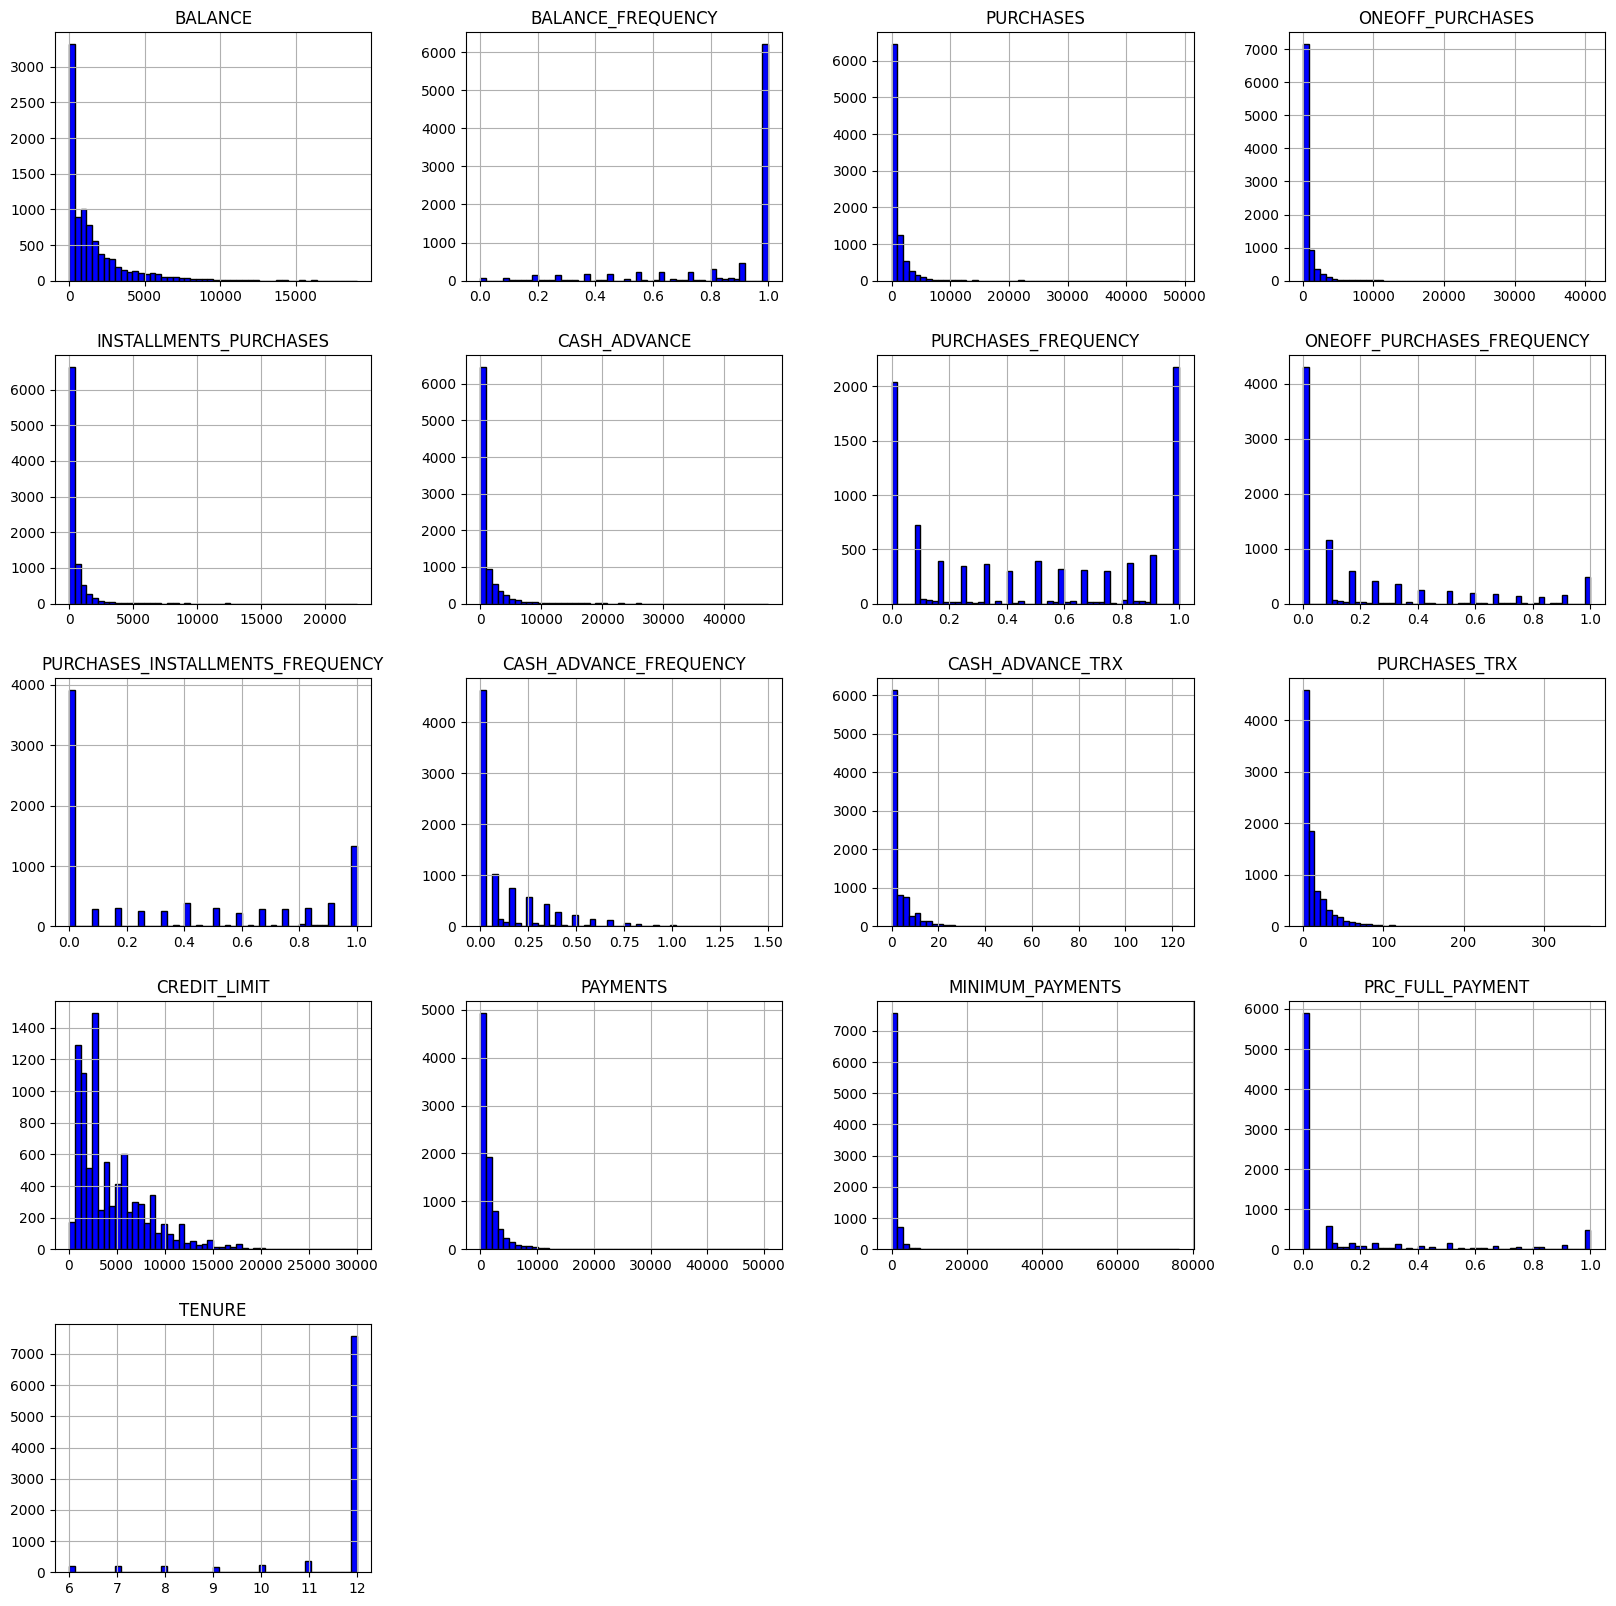

In [11]:
# most of the colmns data are skewed.
df.hist(figsize=(20, 20), bins=50, color='blue', edgecolor='black')
plt.show()

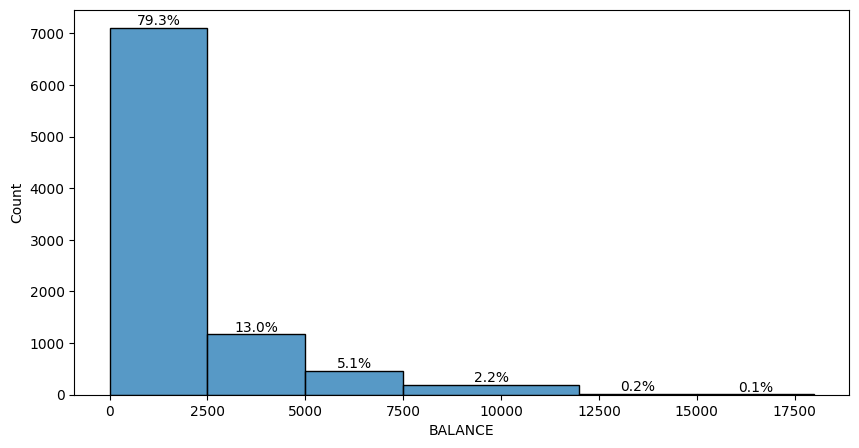

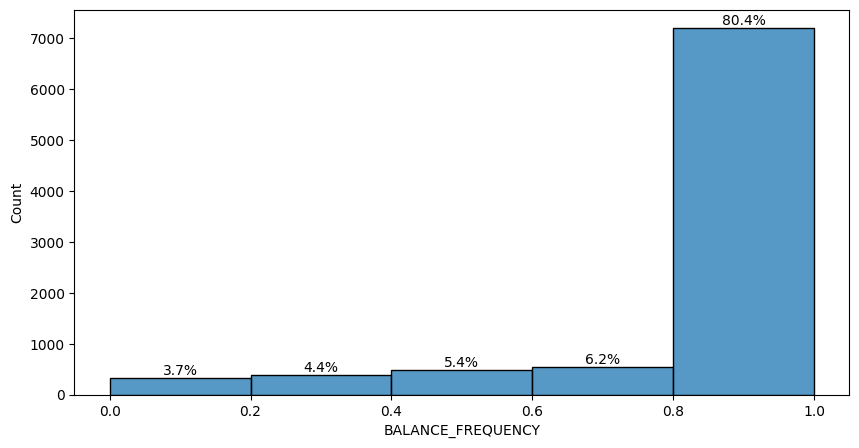

In [13]:
col = ["BALANCE", "BALANCE_FREQUENCY"]
bins = [[0, 2500, 5000, 7500, 12000, 15000, 18000], [0, 0.2, 0.4, 0.6, 0.8, 1]]

for i in range(len(col)):
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins[i])

    total_count = len(df)
    
    # Add percentages at the top of each bar
    for patch in ax.patches:
        percentage = f'{100 * patch.get_height() / total_count:.1f}%'
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()


#### -> **79.3%** of customers mantain their account balance by not exceeding 2500$ so most of customer prefer spending money.

#### -> **80.4%** Most of customers updated their account balance so they always use it and activate their credit card frequently.

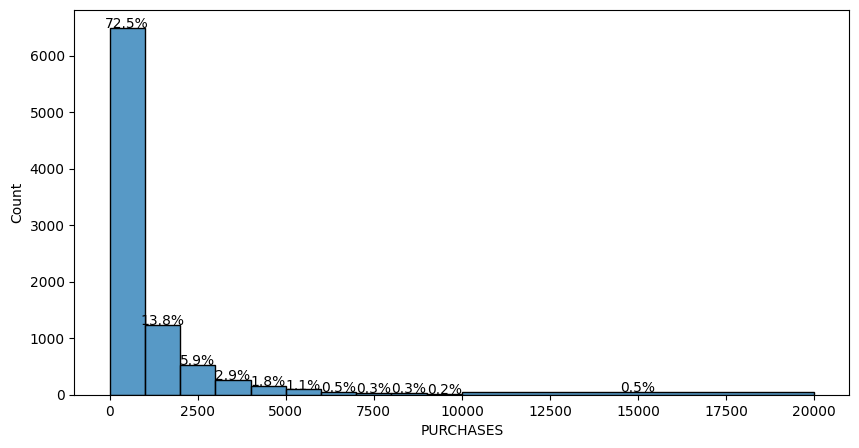

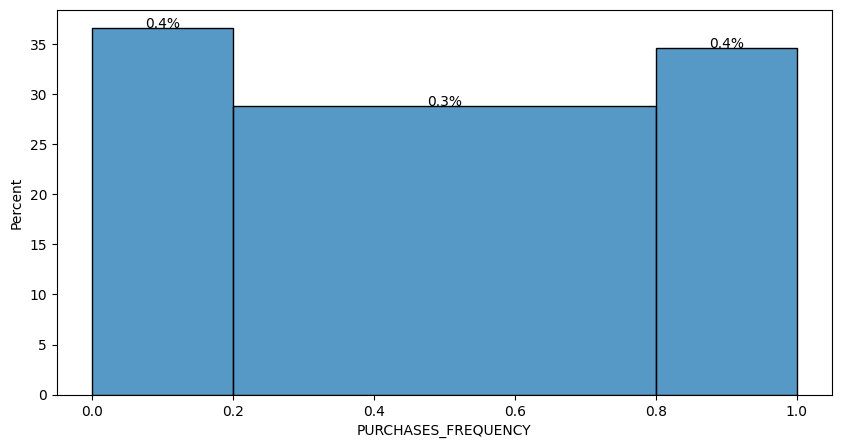

In [14]:
col = ['PURCHASES', 'PURCHASES_FREQUENCY']
bins = [[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000] , [0, 0.2, 0.8, 1] ]
stat = ['count' , 'percent']

for i in range(len(col)):
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(data = df,x = col[i] , bins = bins[i] , stat = stat[i] )
    
    total_count = len(df)
    patches = ax.patches
    for i in range(len(patches)):
        
        percentage = '{:.1f}%'.format(100 * (patches[i].get_height()/total_count))
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+.05
        ax.annotate(percentage, (x, y), ha='center')
    
    plt.show()

#### -> **72.5%** skewness of data to the left in purchases, alot of people make purchases from 0 to 6000 or don't buy anything.

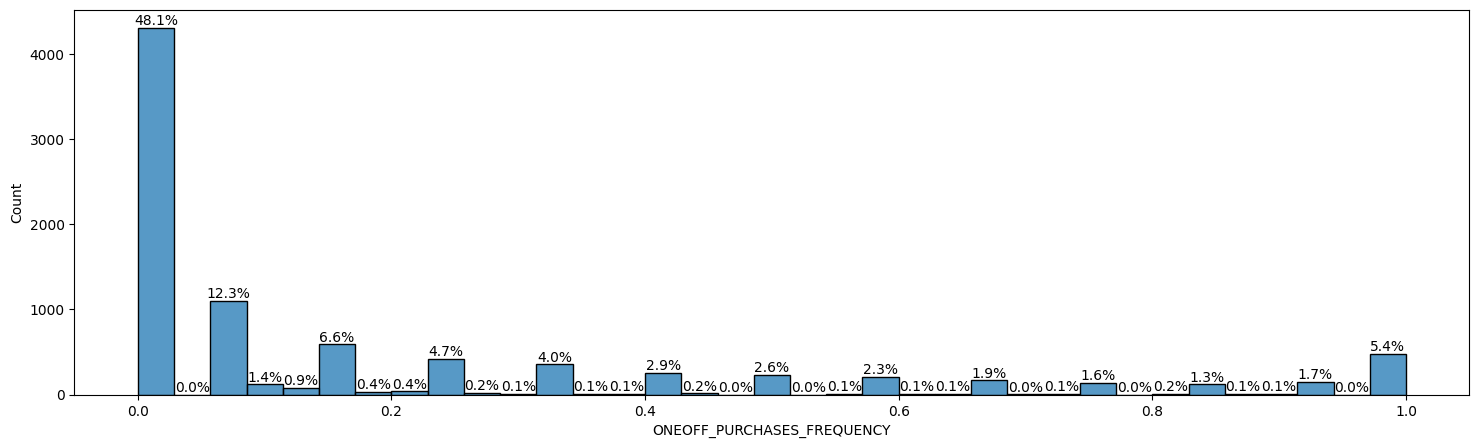

In [15]:
col = 'ONEOFF_PURCHASES_FREQUENCY'

plt.figure(figsize=(18, 5))
ax = sns.histplot(data=df, x=col)

# Add percentages on each bar
total = float(len(df[col]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


#### -> **48.1%** not prefer make purchases in one go.

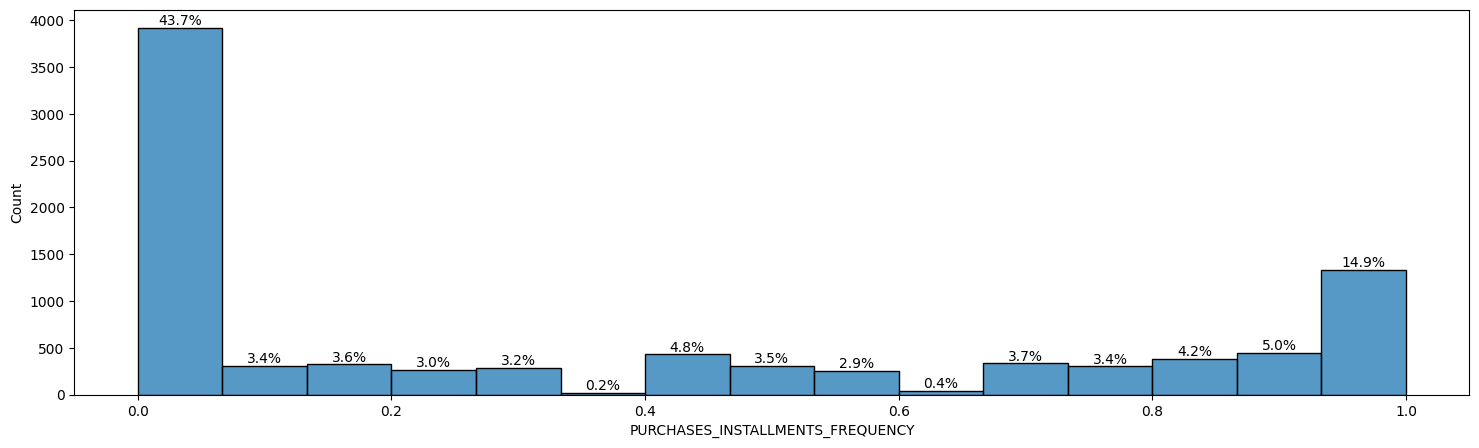

In [16]:
# 0 = no full payment, 1 = full payment
col = 'PURCHASES_INSTALLMENTS_FREQUENCY'

plt.figure(figsize=(18, 5))
ax = sns.histplot(data=df, x=col)

# Add percentages on each bar
total = float(len(df[col]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


#### -> **43.7%** not prefer purchase in installments but about **14.9** prefer purchasing in installments.

#### -> from the previous 2 plots, we conclude that people prefer to buy with installements than one-off purchase.

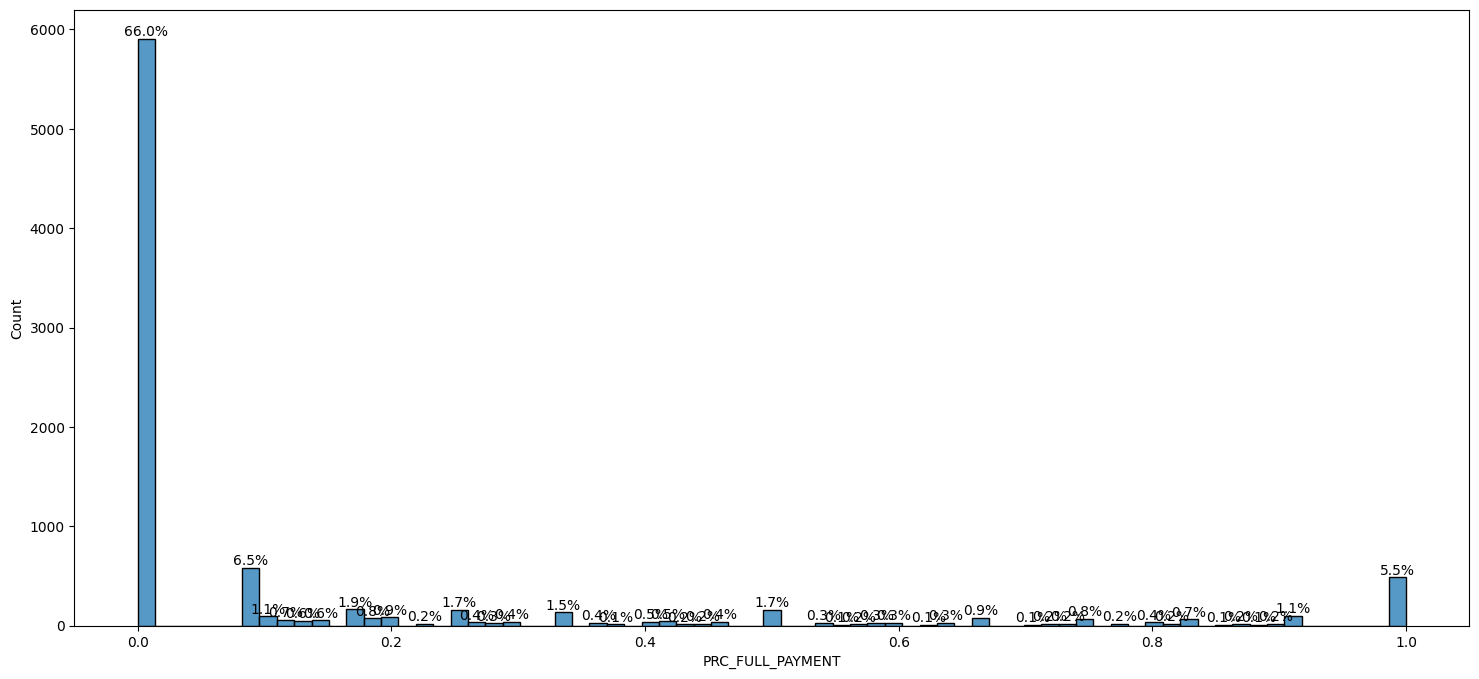

In [17]:
col = 'PRC_FULL_PAYMENT'

plt.figure(figsize=(18, 8))
ax = sns.histplot(data=df, x=col)

# Add percentages on each bar
total = float(len(df[col]))
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    if percentage > 0.0:
        annotation_text = '{:.1f}%'.format(percentage)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(annotation_text, (x, y), ha='center', va='bottom')

plt.show()

#### -> **66%** most people don't prefer full payment due each month.

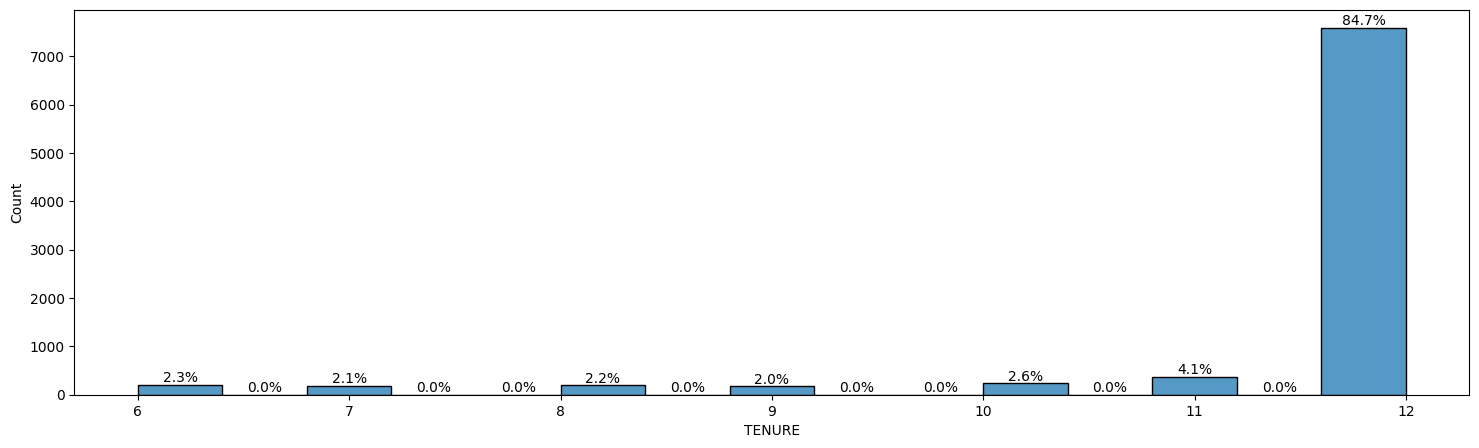

In [18]:
# tenure = expiry of credit card which is 12 months
col = 'TENURE'

plt.figure(figsize=(18, 5))
ax = sns.histplot(data = df, x = col)

# Add percentages on each bar
total = float(len(df[col]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### -> most customers have their credits valid for 12 months (84.7%)

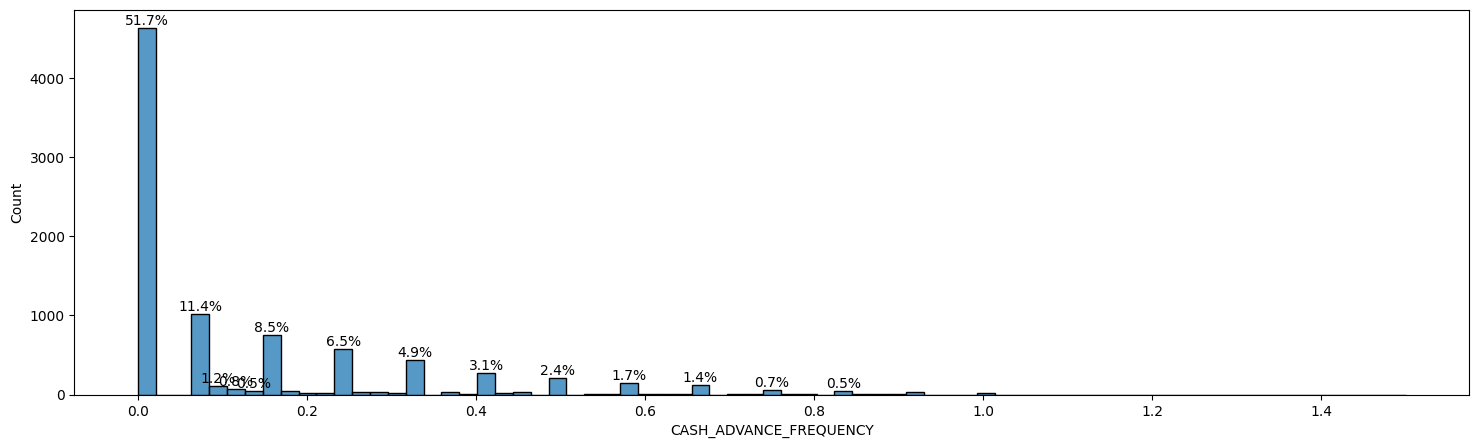

In [19]:
col = ['CASH_ADVANCE_FREQUENCY']

for i in range(len(col)):
    plt.figure(figsize=(18, 5))
    ax = sns.histplot(data=df, x=col[i])
    
    # Add percentages on each bar
    total = float(len(df[col[i]]))
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        if percentage >= 0.5:
            annotation_text = '{:.1f}%'.format(percentage)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(annotation_text, (x, y), ha='center', va='bottom')
    
    plt.show()


#### -> **51.7%** not prefer cash-frequency so they avoid this method of payment.

### Outliers detection

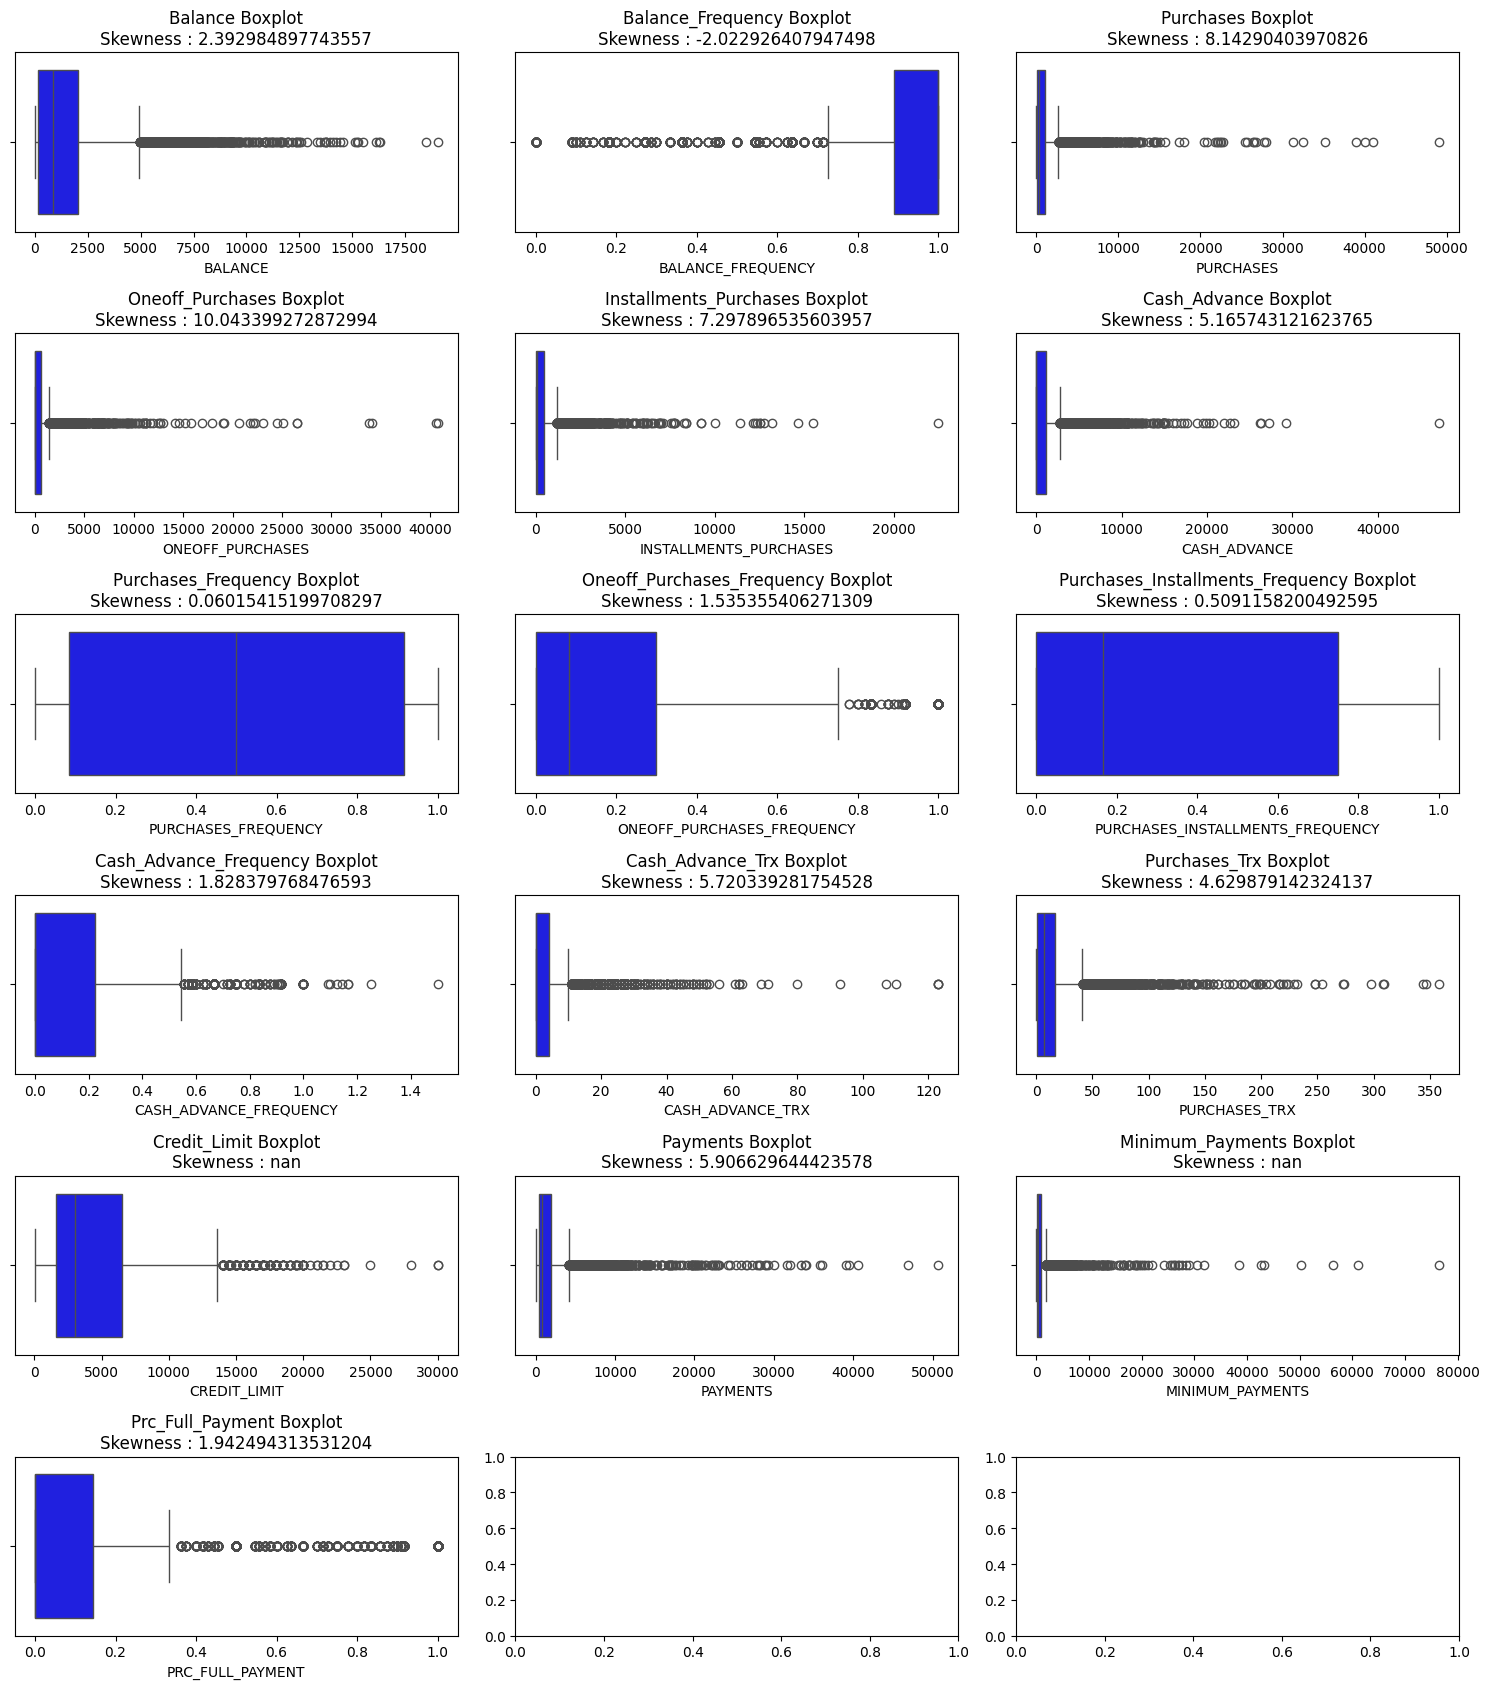

In [21]:
# too much outliers but can't clean data out, bec they may be important to us or we'll remove most of the data and be left with nothing for training and testing.
columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

def Distrubtion_of_data(dataframe,columns):
    fig, ax = plt.subplots(6, 3, figsize=(15,17));
    ax = ax.ravel();
    for i,column in enumerate(columns):
#         plt.figure(figsize = (30,5));
        skewness_value = skew(dataframe[column], bias=True);
        plt.sca(ax[i]);
        sns.boxplot(data=dataframe, x=column, color='blue');
        plt.title(f'{column.title()} Boxplot\nSkewness : {skewness_value}', fontsize=12);

    plt.tight_layout();
    
Distrubtion_of_data(df, columns);
    

1- Purchases_installments_frequency and Purchases_frequency don't have outliers in data.<br>
2- most if not all the columns are with positive skewness maybe just one that tends to be in normal distribution, while the balance_frequency column gives negative skewness in data.

Oneoff-purchases as equal as purchases with high correlation


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Cust_ID column.<br>
2- Null values<br>
3- Outliers


In [22]:
# make a copy for the original dataset
df_copy = df.copy()

In [23]:
df_copy.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### for each issue adapt this methodology
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**First issue** 
#### drop cust_id

In [24]:
# solution
df_copy.drop(['CUST_ID'], axis=1, inplace=True)

In [25]:
# test
df_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

**Second issue**
#### drop nulls in credit_limit and in minimum_payments as they are only 3% and will not affect training.

In [26]:
#solution
df_copy.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df_copy.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)

In [27]:
df_copy.shape

(8636, 17)

In [28]:
# Test
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [29]:
# test
df_copy.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

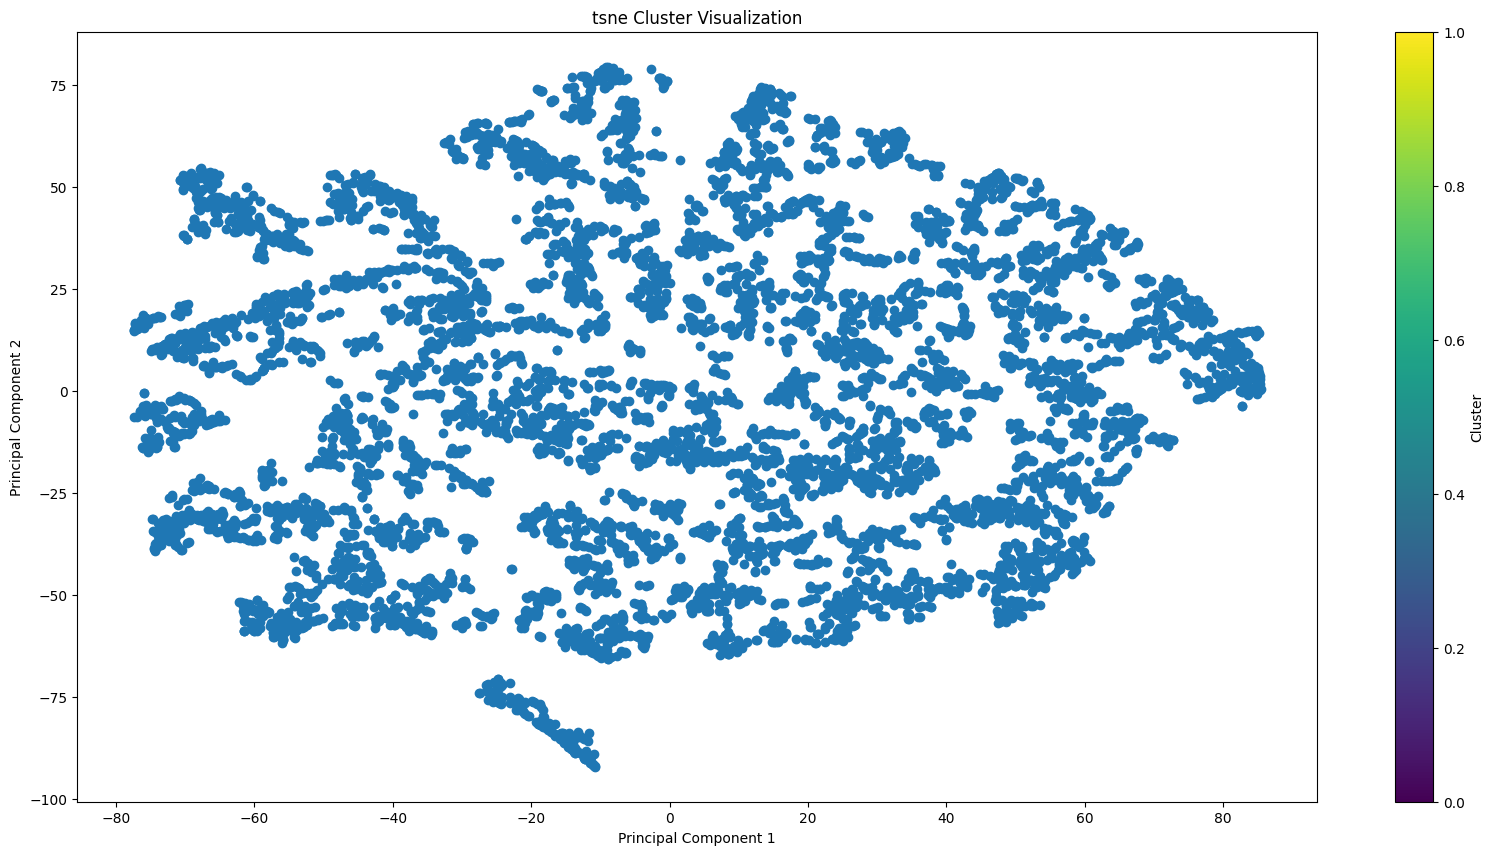

In [30]:
def visual_tsne(data , c=None):
    tsne = TSNE(n_components=2)
    tsne_data = tsne.fit_transform(data)

    plt.figure(figsize=(20,10))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1],c=c ,  cmap='viridis')
    plt.title('tsne Cluster Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
visual_tsne(df_copy)

In [32]:
df_copy.shape

(8636, 17)

In [33]:
# df2_orig = df2.copy()
df2_orig = df_copy.copy()
df2 = df_copy

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

#### Plot all features distributions in order to get features with high skewness.

In [34]:
def visual_tsne(data , c=None):
    tsne = TSNE(n_components=2)
    tsne_data = tsne.fit_transform(data)

    plt.figure(figsize=(20,10))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1],c=c ,  cmap='viridis')
    plt.title('tsne Cluster Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

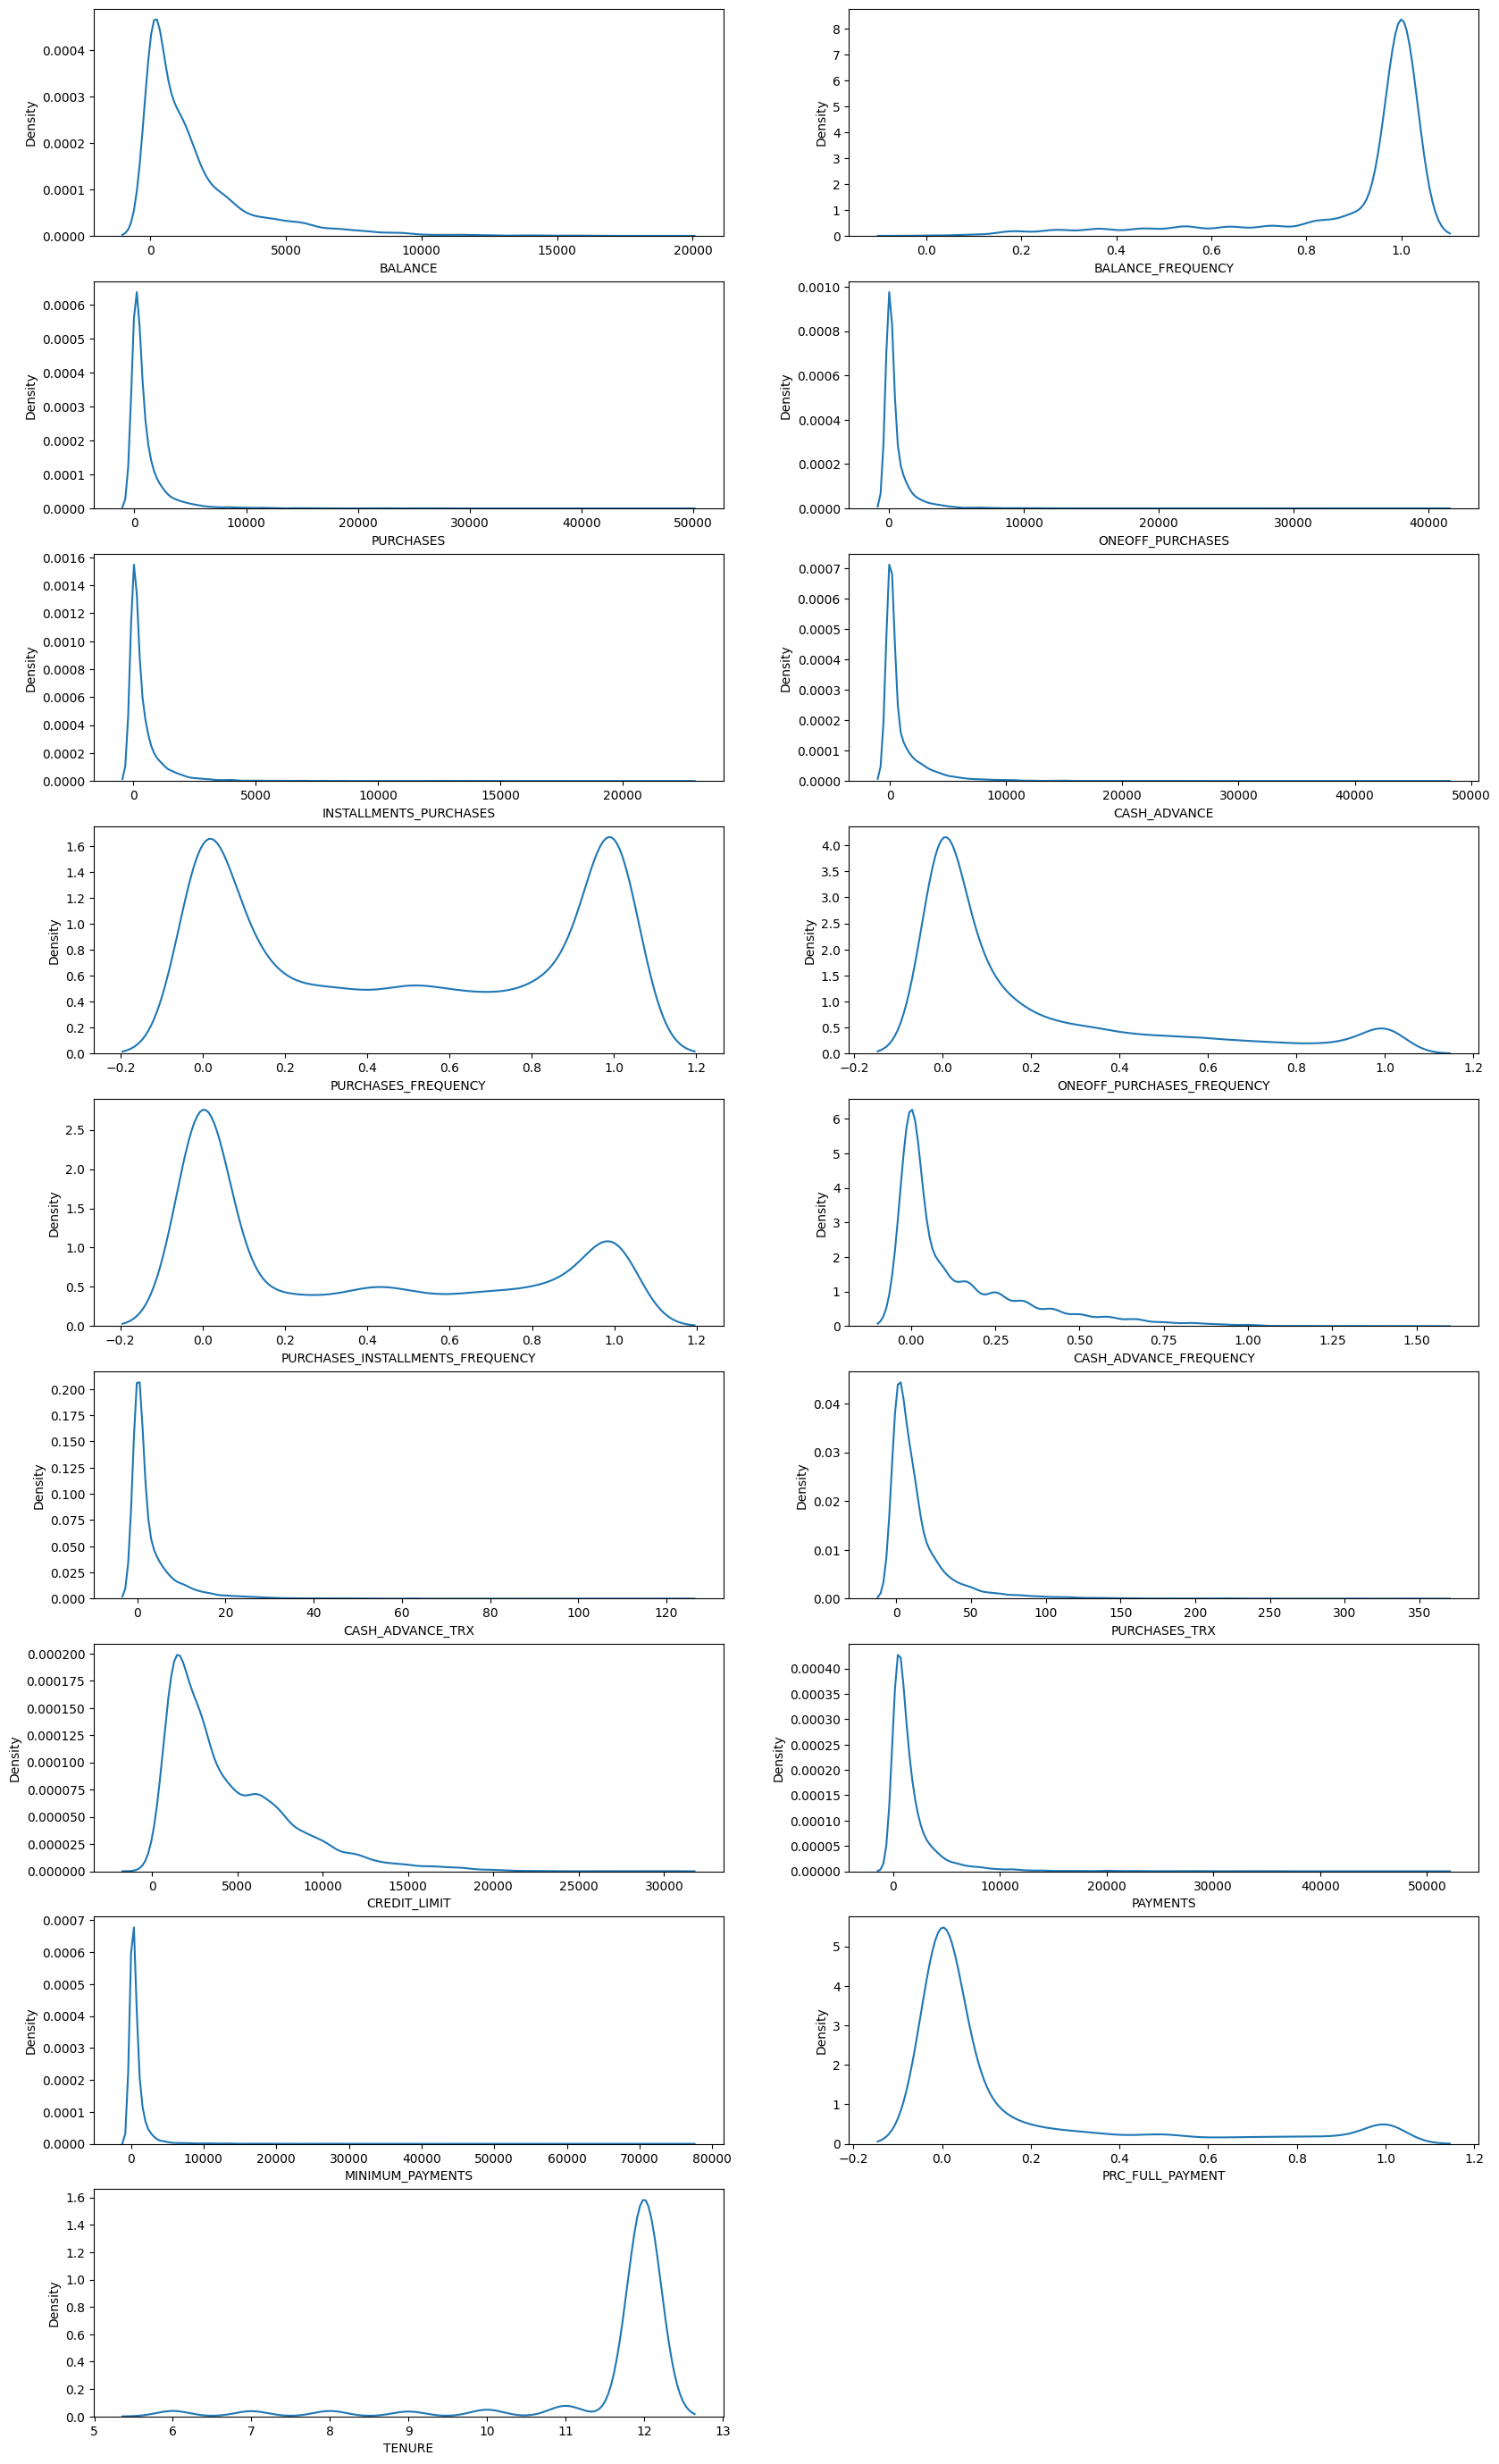

In [35]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df2.columns):
    if df2[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df2[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

#### Applying log transformation on them to get normal distributions.

In [92]:
not_included = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

# to get the range between 0, 1
log_scaled = np.log(0.1 + df2[cols])

In [37]:
log_scaled.shape

(8636, 11)

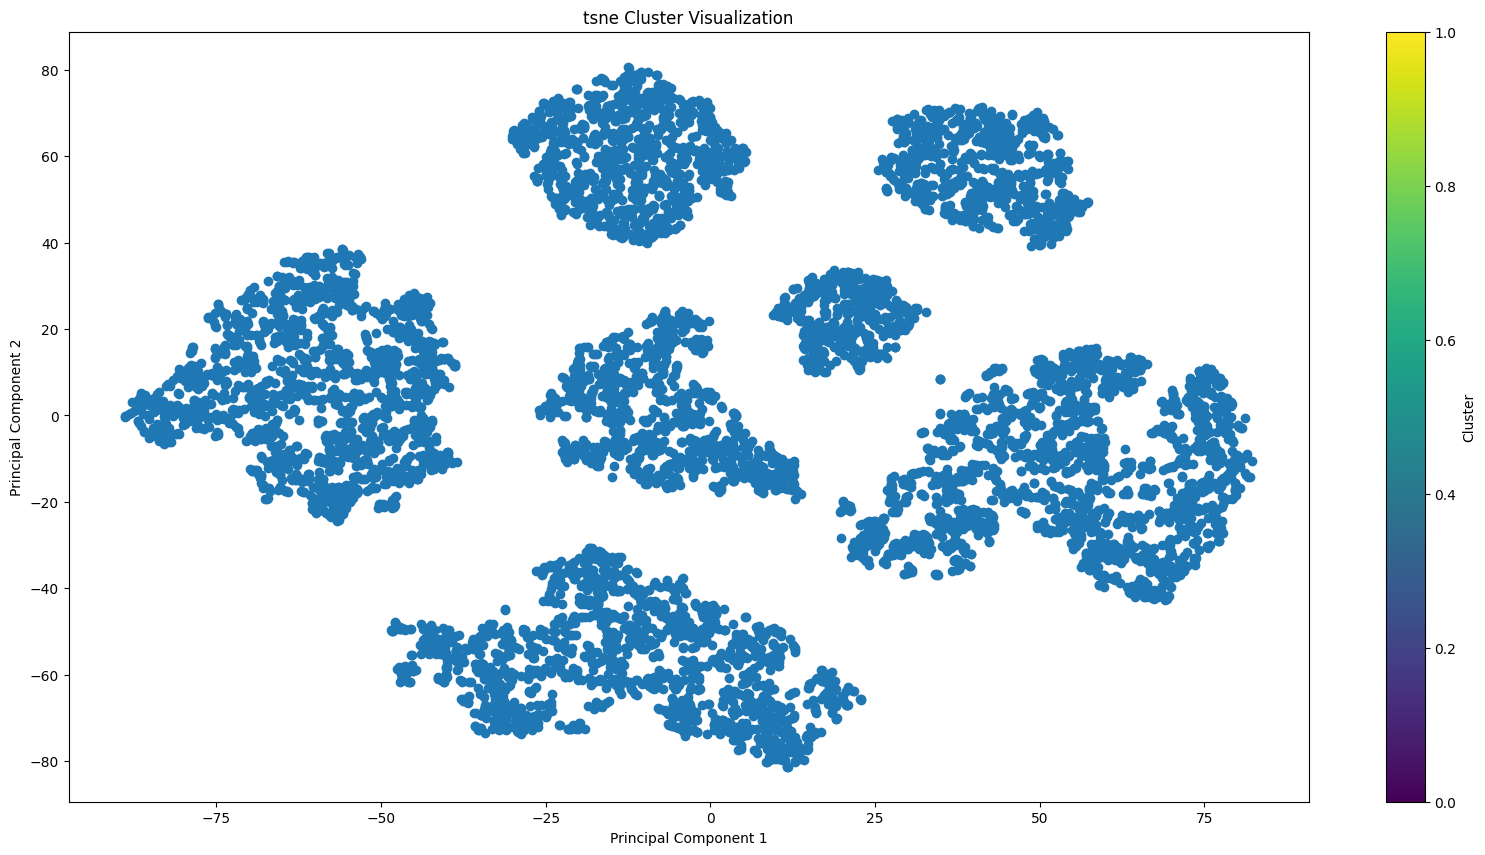

In [38]:
# combined the transformed data with the other columns
df_combined = pd.concat([df2.drop(columns=cols), log_scaled], axis=1)
visual_tsne(df_combined)

In [39]:
df_combined.shape

(8636, 17)

In [40]:
# then we apply standard scaler to deal with outliers and make data in same range approximately
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_combined)
data_scaled_df = pd.DataFrame(data_scaled, columns=df_combined.columns)


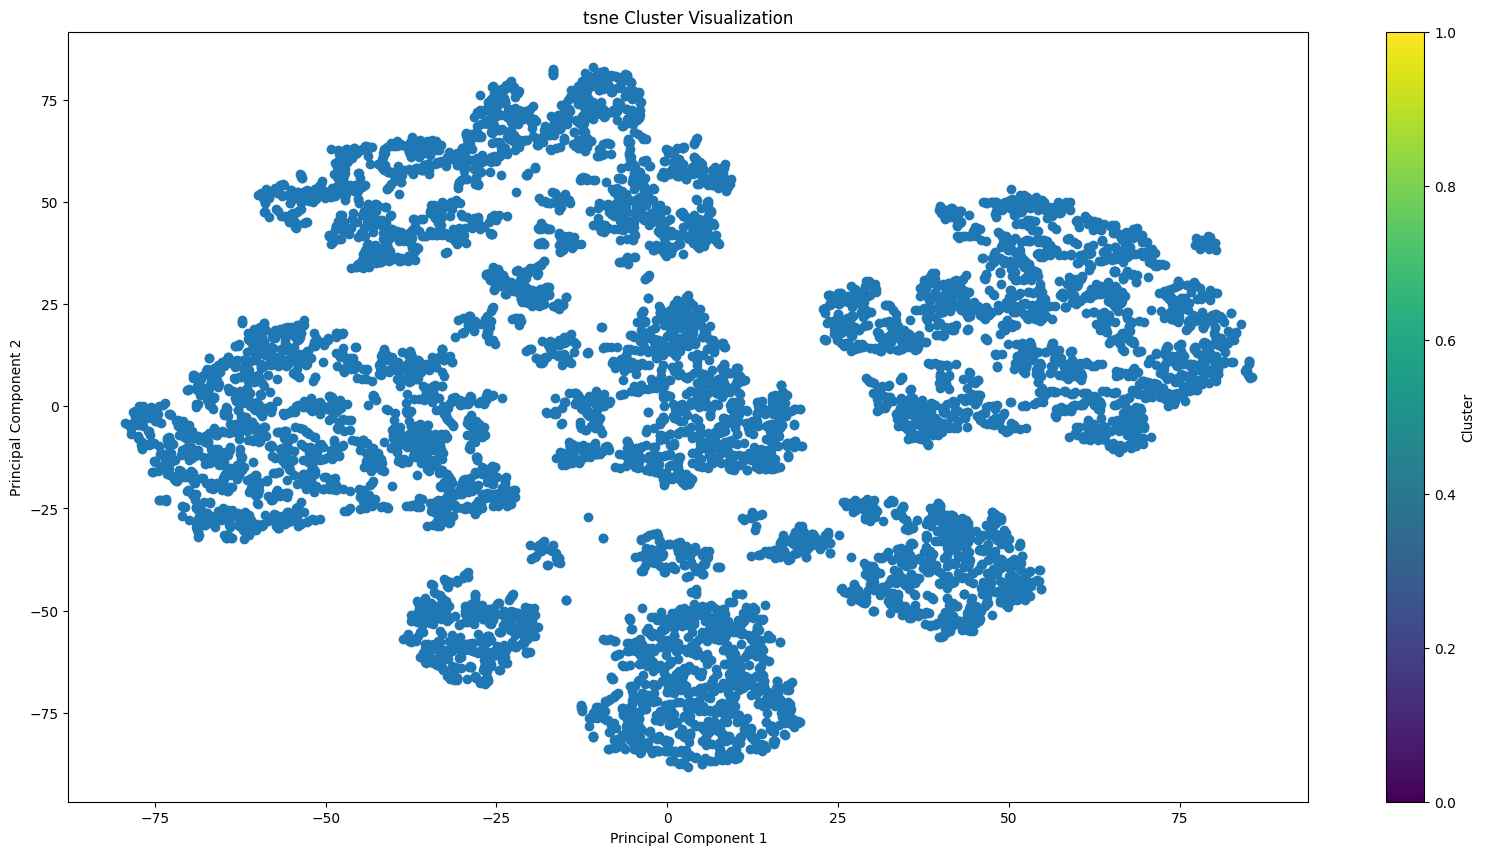

In [41]:
# this is tsne after scaling we can see that standard scaling made it more worse
visual_tsne(data_scaled)

#### the clusters arenot yet defined using the standardscaler.

In [42]:
# Robustscaler
scaler = RobustScaler()
data_scaled2 = scaler.fit_transform(df_combined)
data_scaled2_df = pd.DataFrame(data_scaled2, columns=df_combined.columns)

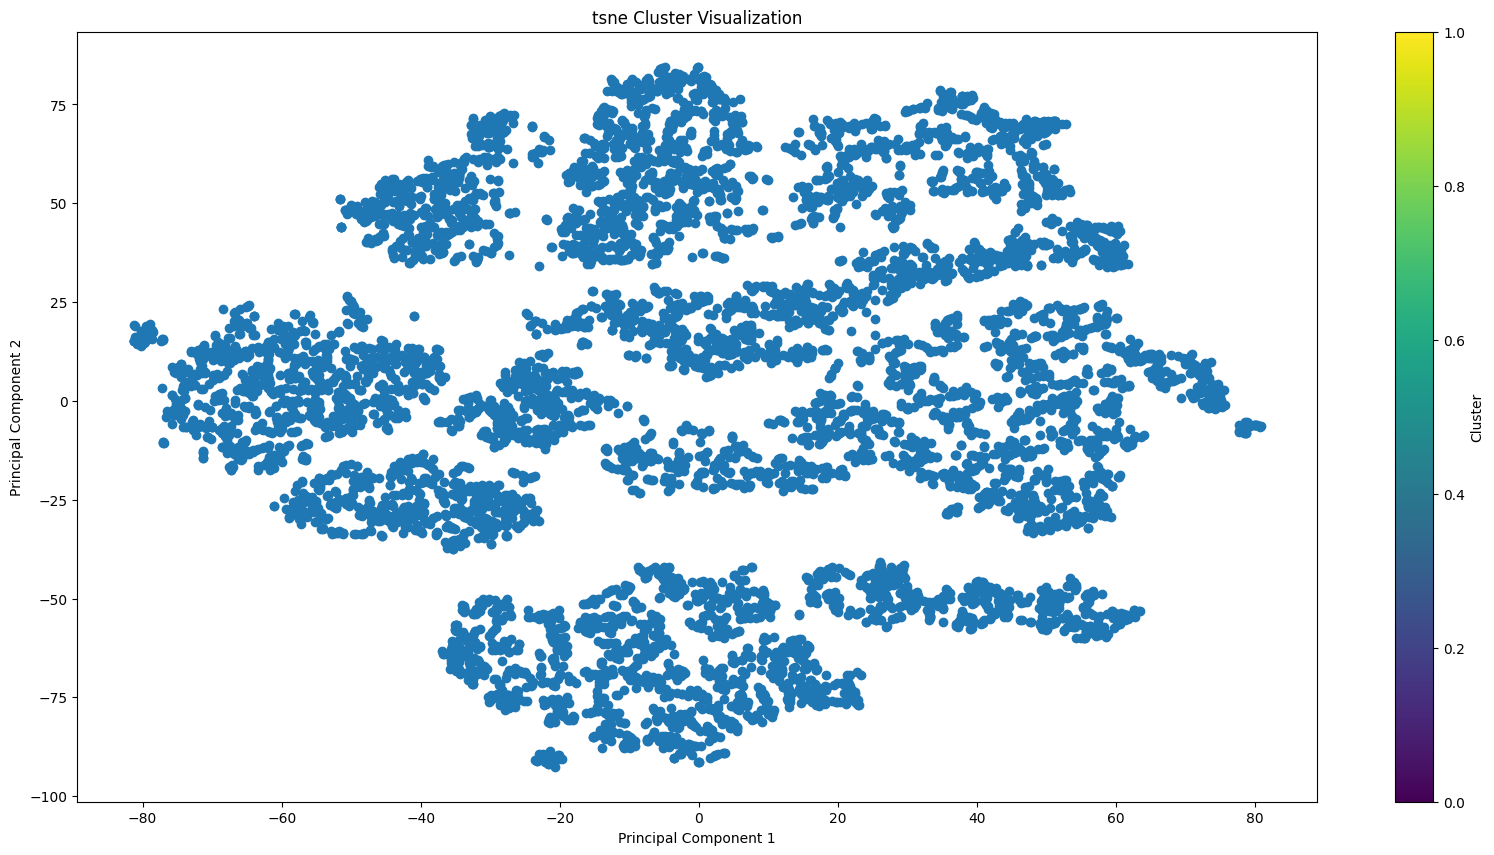

In [43]:
# this is tsne after scaling we can see that robust scaling made it even more worse
visual_tsne(data_scaled2)

#### here the robust scaler is more worse than the standard scaler.

In [44]:
scaler = MinMaxScaler()
data_scaled3 = scaler.fit_transform(df_combined)
data_scaled3_df = pd.DataFrame(data_scaled3, columns=df_combined.columns)


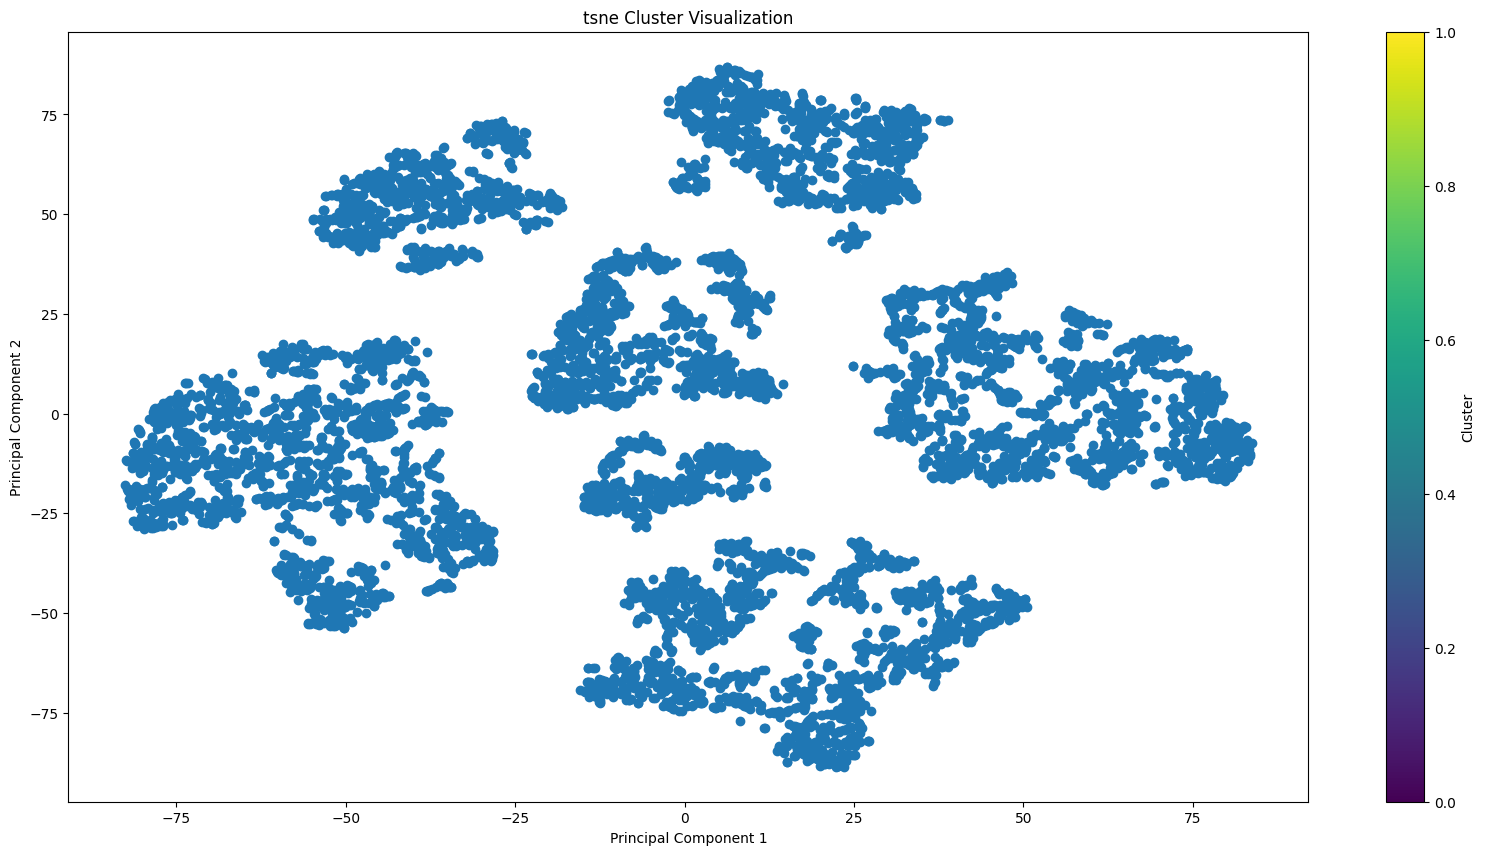

In [45]:
visual_tsne(data_scaled3)

#### Minmax scaler is more defined than the last 2 which is good.

### PCA

In [46]:
pca = PCA(n_components=0.95)
pca_data_without_scaling = pca.fit_transform(df_combined)

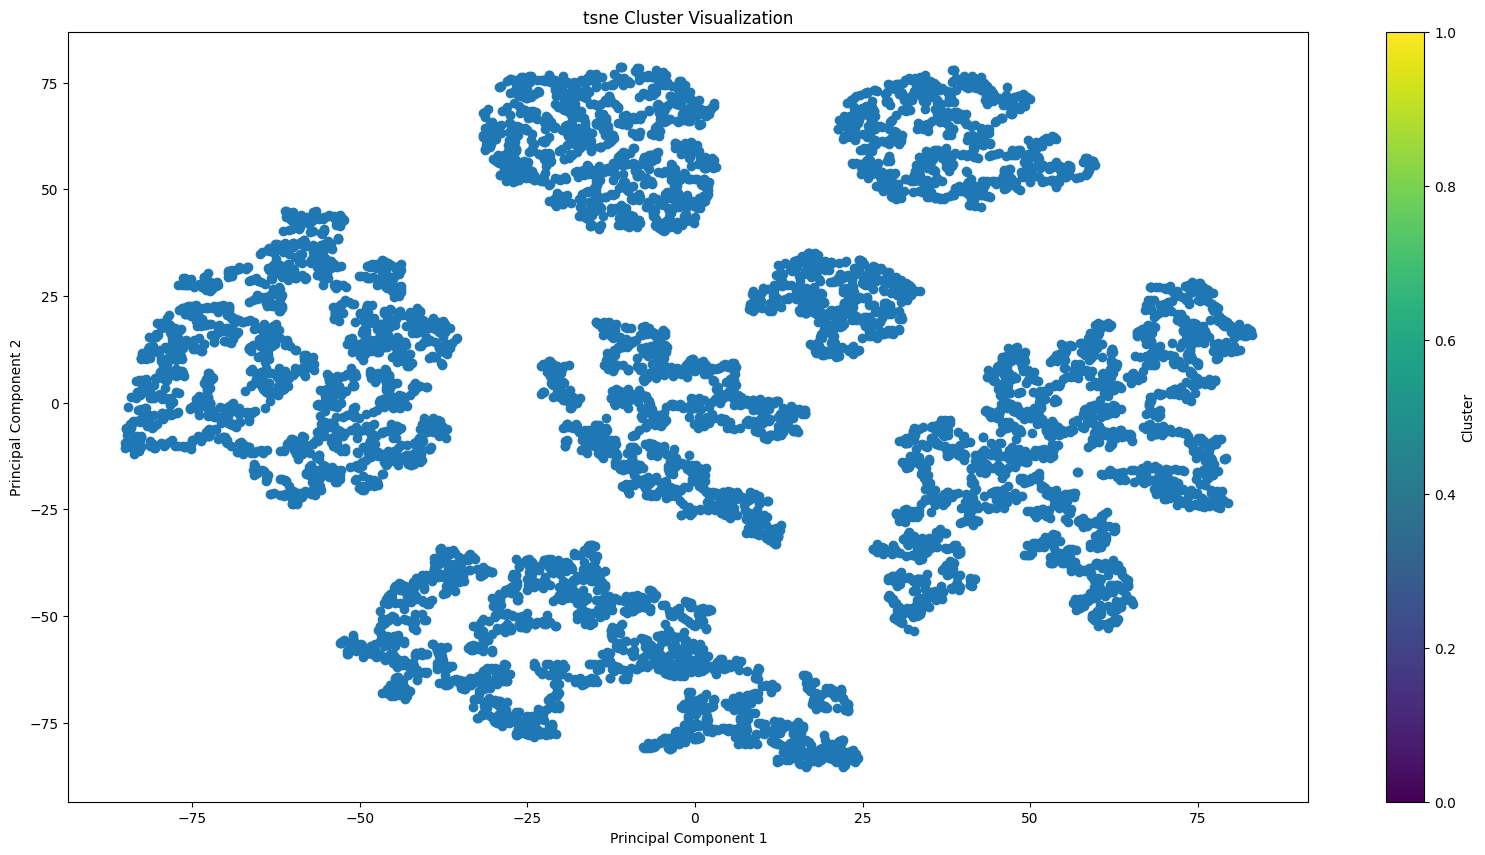

In [47]:
visual_tsne(pca_data_without_scaling)

In [48]:
# pca with 0.999 make the tsne better in seperation with only 7 cluster.
# I tried alot of values for n_components and found that this was the best value according to tsne.

pca = PCA(n_components=0.999)
pca_data_no_scaling = pca.fit_transform(df_combined)

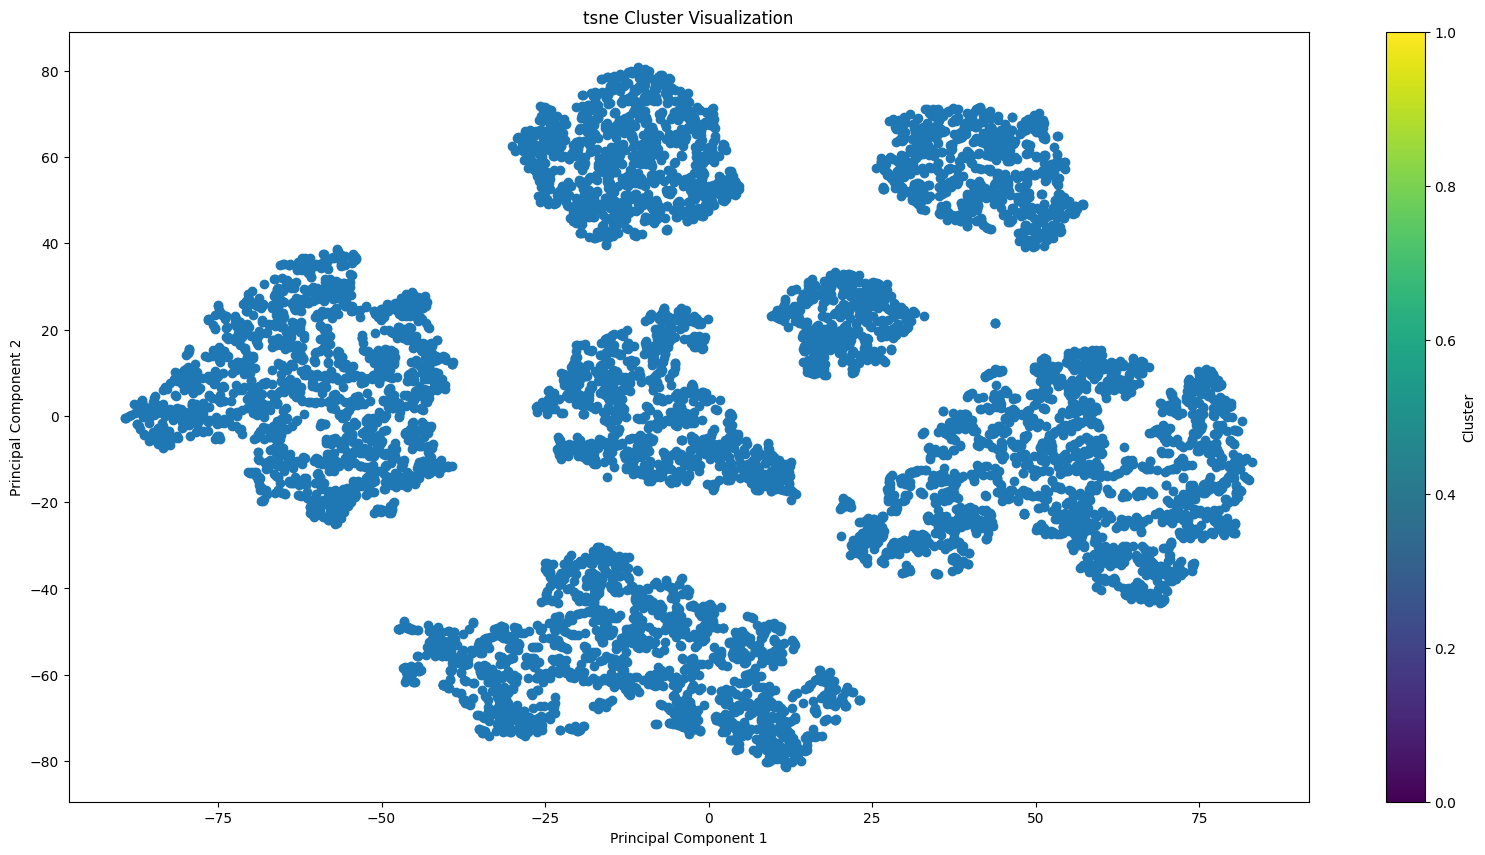

In [49]:
visual_tsne(pca_data_no_scaling)

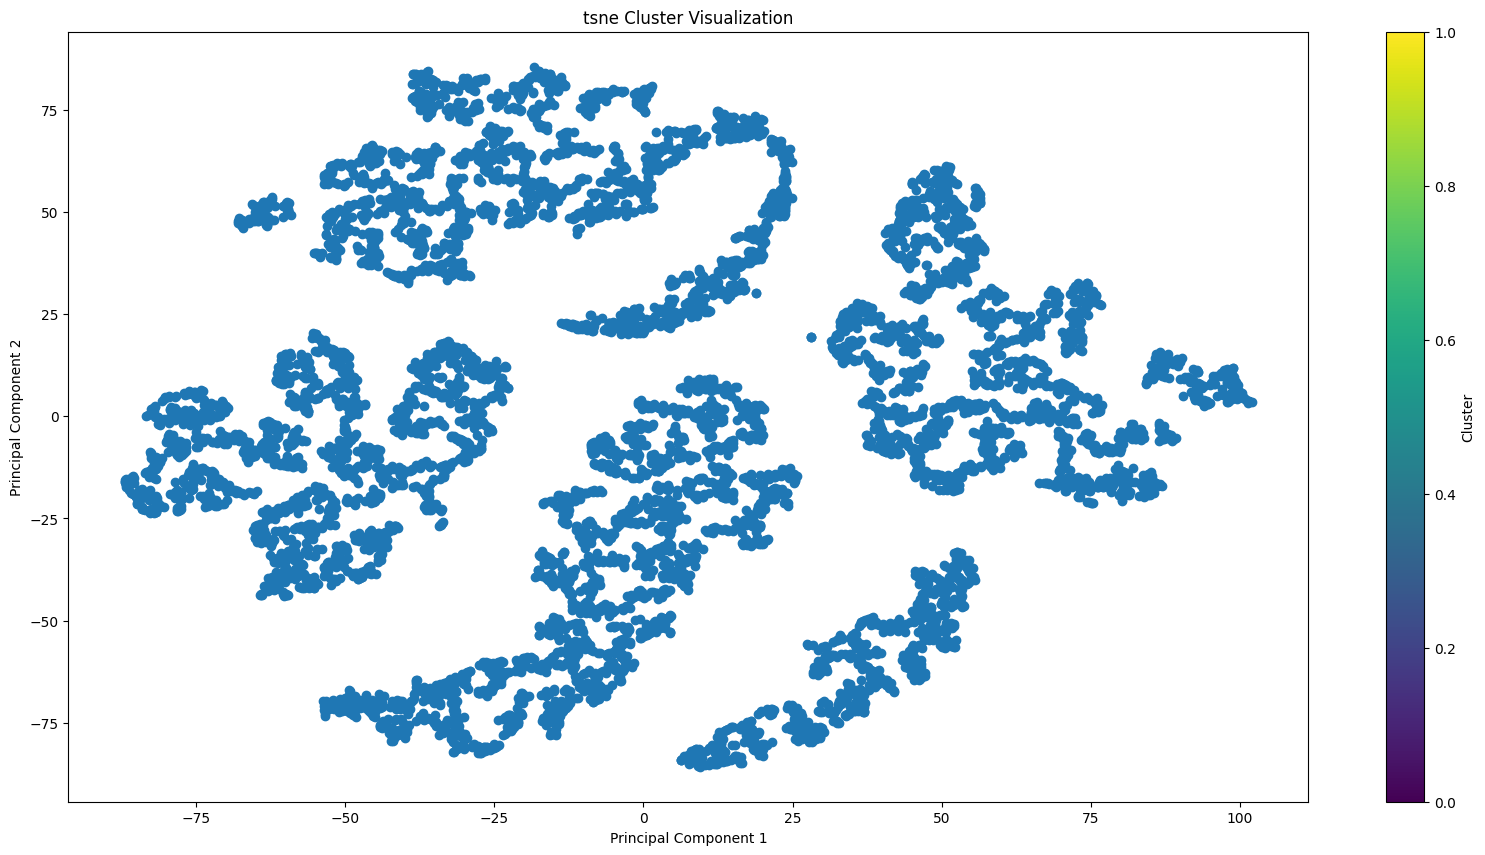

In [50]:
kpca = KernelPCA(n_components=2, kernel='cosine')

kpca_data = kpca.fit_transform(df_combined)

visual_tsne(kpca_data)

#### kernal pca made the clusters appear more complex than normal pca and not defined, it appears in density form.

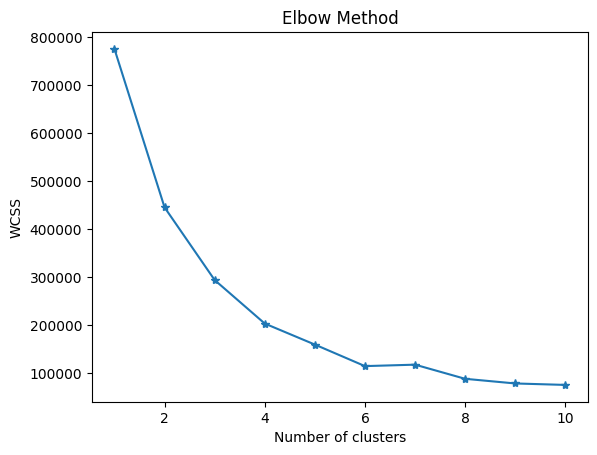

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data_no_scaling)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### i think for the inertia graph the best k will be 7.

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data

2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result

3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)

4- (Optionally) make a method that pick the best number of clusters for you

5- Using different techniques for scaling and comment on the result

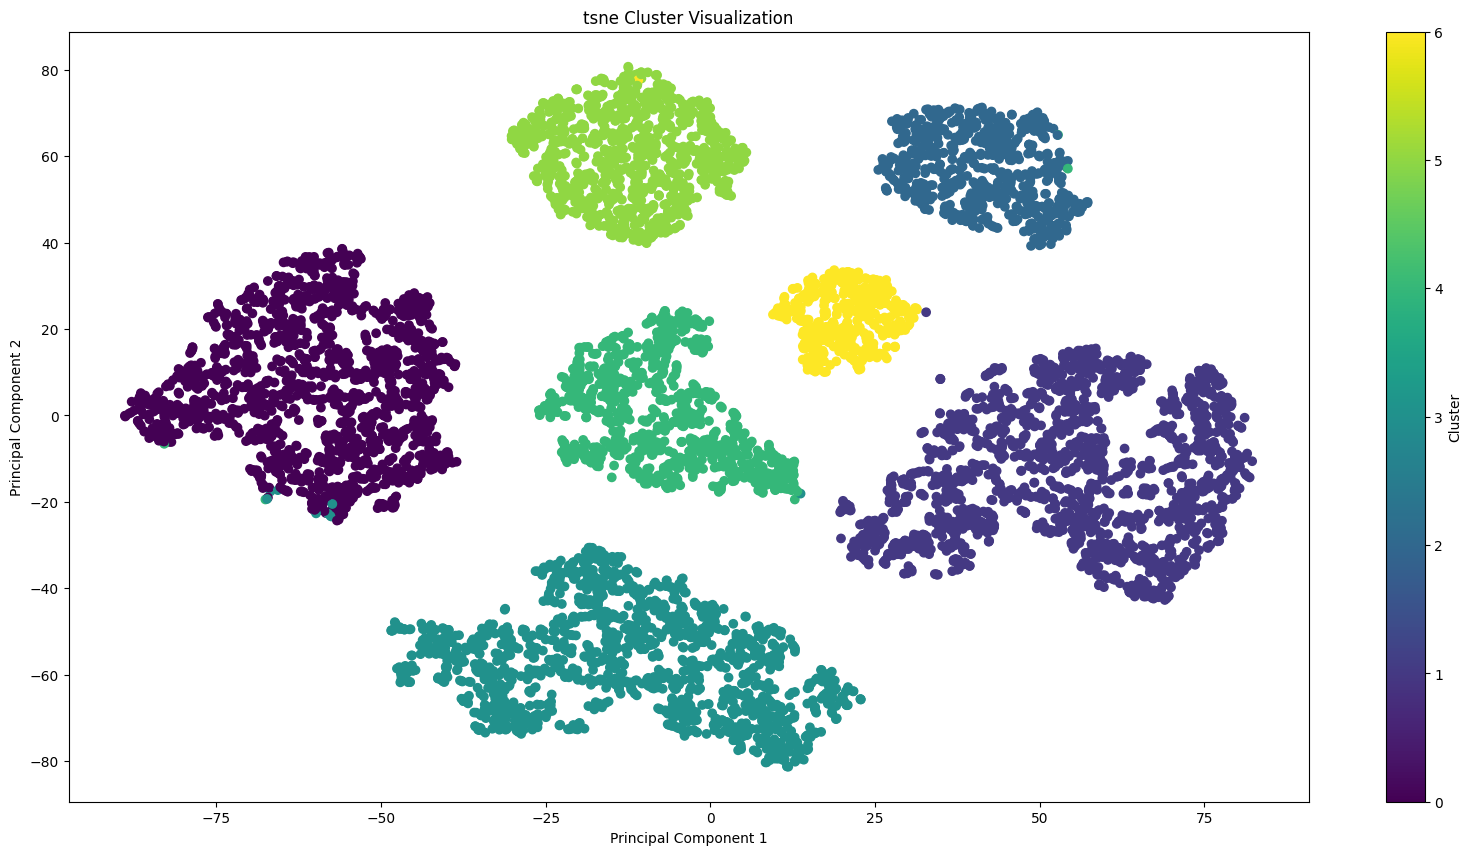

In [74]:
# apply kmeans using combined data(log transformed, rest of the data)
kmeans = KMeans(n_clusters=7)

kmeans.fit(df_combined)

labels = kmeans.labels_

visual_tsne(df_combined, labels)

In [76]:
labels

array([3, 1, 4, ..., 3, 1, 2])

In [75]:
silhouette_avg = silhouette_score(df_combined, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5786682217518073


#### DBSCAN Algorithm

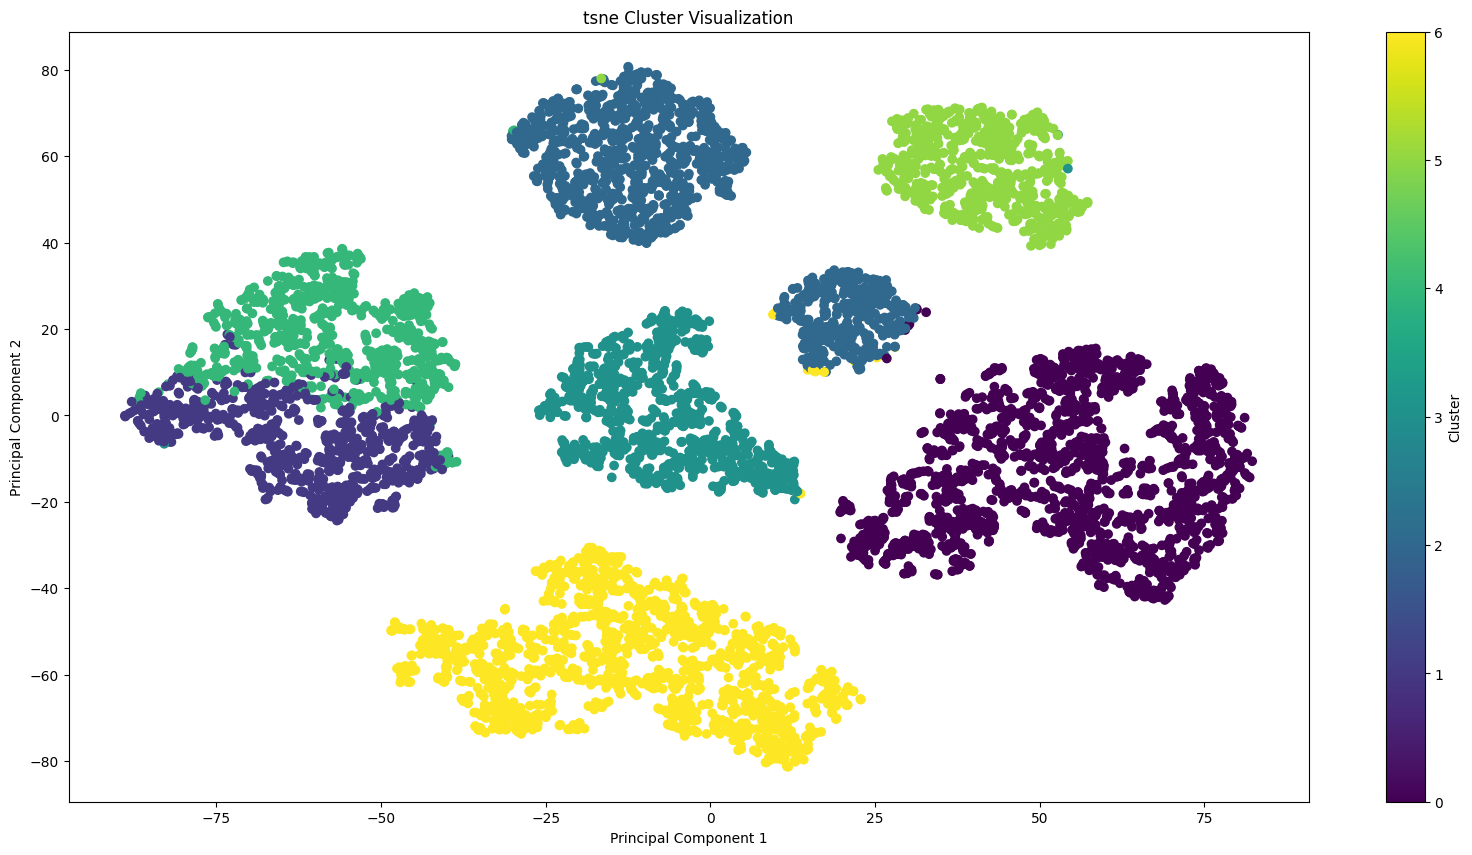

In [77]:
# Use DBSCAN for anomaly detection
dbscan = DBSCAN(eps = 3, min_samples=int(np.log(17)))
dbscanclusters = dbscan.fit_predict(df_combined)

anomalies = df_combined[dbscanclusters == -1]

kmeans = KMeans(n_clusters=7)
kmeans.fit(df_combined)
labels = kmeans.labels_

visual_tsne(df_combined, labels)

#### Isolation forest Algorithm

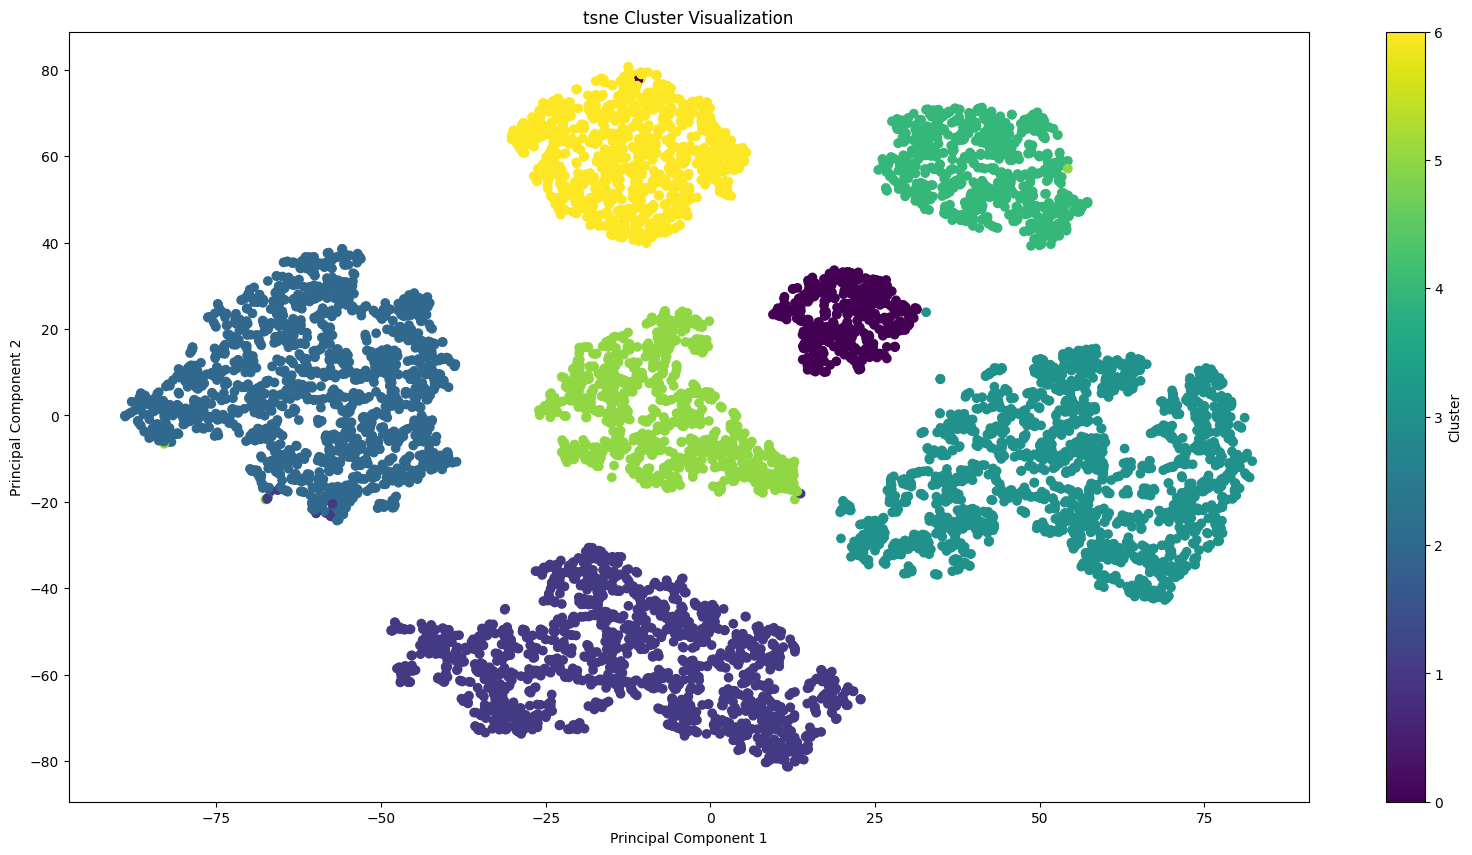

In [78]:
# Use isolation forest for anomaly detection
isolation_forest = IsolationForest()
isolation_forest.fit(df_combined)
outlier_preds = isolation_forest.predict(df_combined)
anomalies = df_combined[outlier_preds == -1]

kmeans = KMeans(n_clusters=7)
kmeans.fit(df_combined)
labels = kmeans.labels_

visual_tsne(df_combined, labels)

#### Expectation Maximization Algorithm

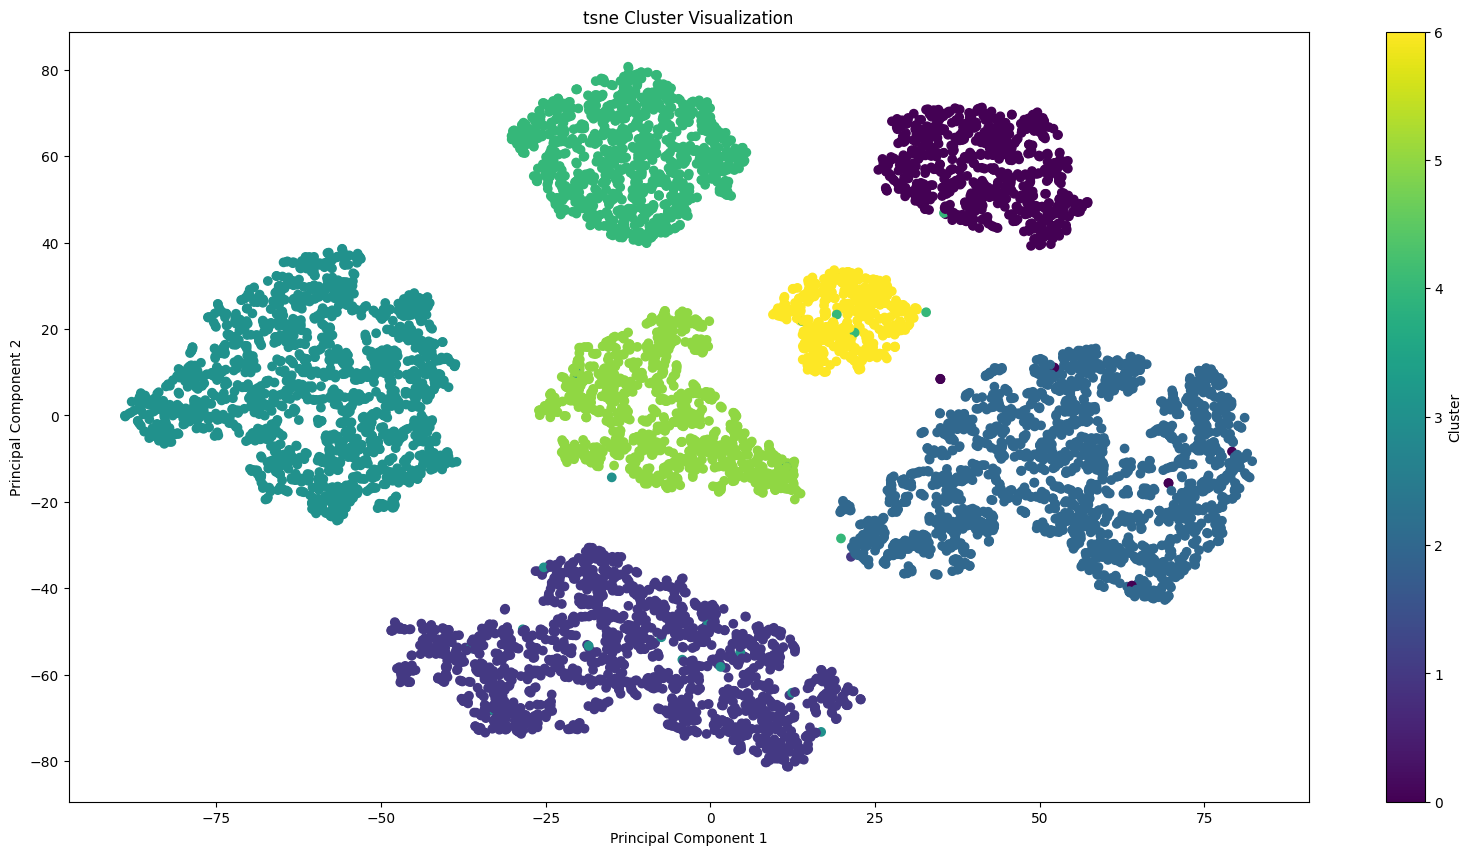

In [79]:
gmm = GaussianMixture(n_components=7, covariance_type='full')

gmm.fit(df_combined)

cluster_labels = gmm.predict(df_combined)

# print(df_combined.head())

visual_tsne(df_combined, cluster_labels)

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
<br>
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
<br>
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

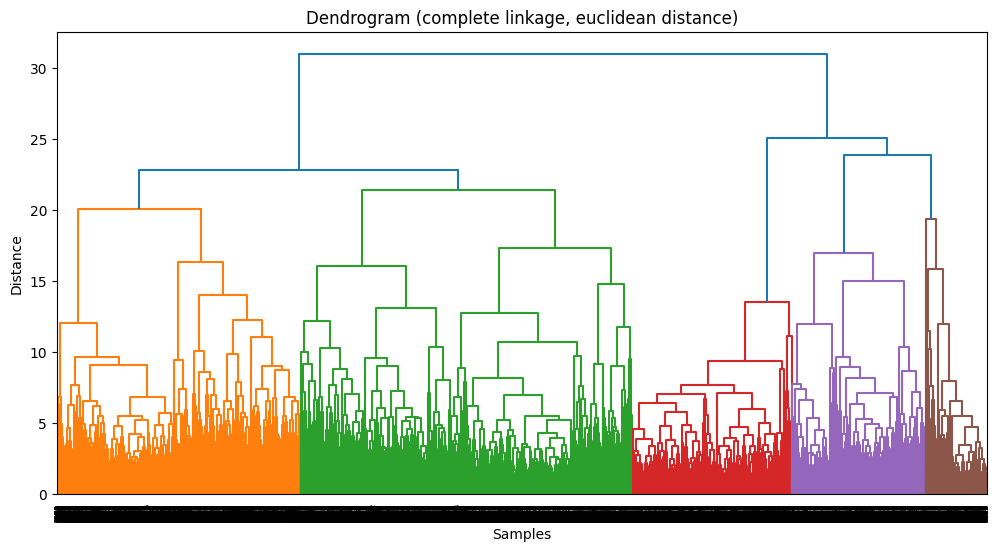

In [63]:
linkage_criteria = 'complete'
distance_function = 'euclidean'

linkage_matrix = shc.linkage(df_combined, method=linkage_criteria, metric=distance_function)

plt.figure(figsize=(12, 6))
plt.title(f"Dendrogram ({linkage_criteria} linkage, {distance_function} distance)")
dendrogram(linkage_matrix)

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


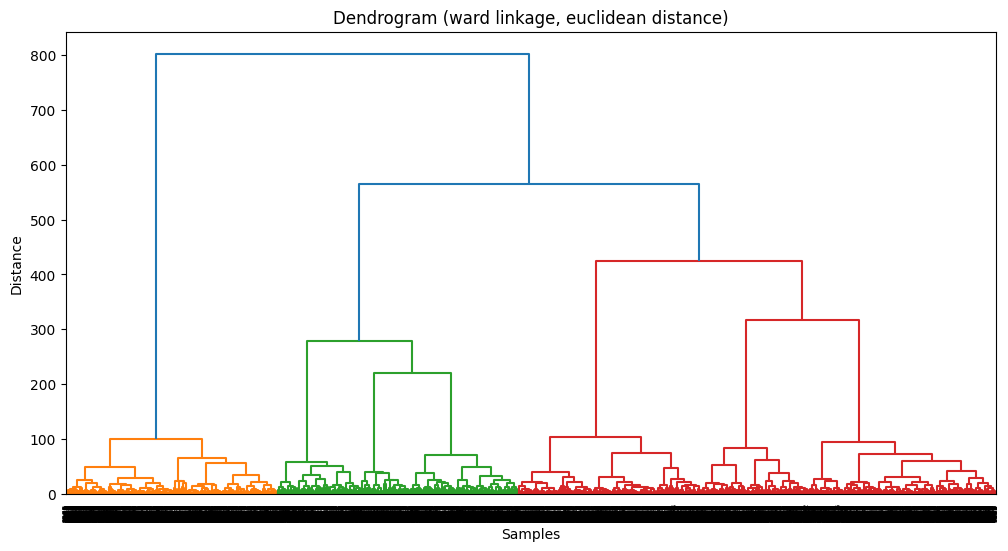

In [65]:
linkage_criteria = 'ward'
distance_function = 'euclidean'

linkage_matrix = shc.linkage(df_combined, method=linkage_criteria, metric=distance_function)

plt.figure(figsize=(12, 6))
plt.title(f"Dendrogram ({linkage_criteria} linkage, {distance_function} distance)")
dendrogram(linkage_matrix)

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


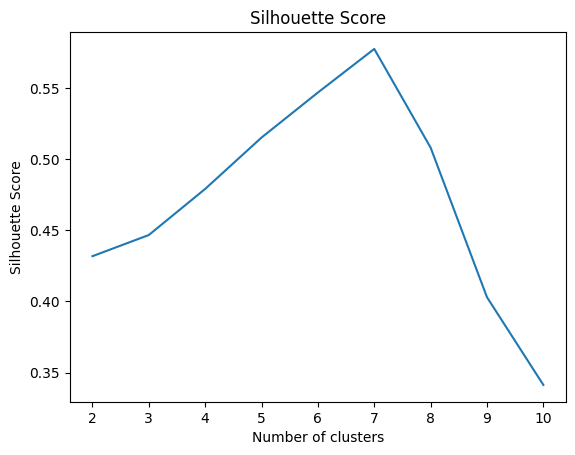

In [66]:
silhouette_scores = []
for i in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=i)
    labels = clustering.fit_predict(df_combined)
    silhouette_scores.append(silhouette_score(df_combined, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

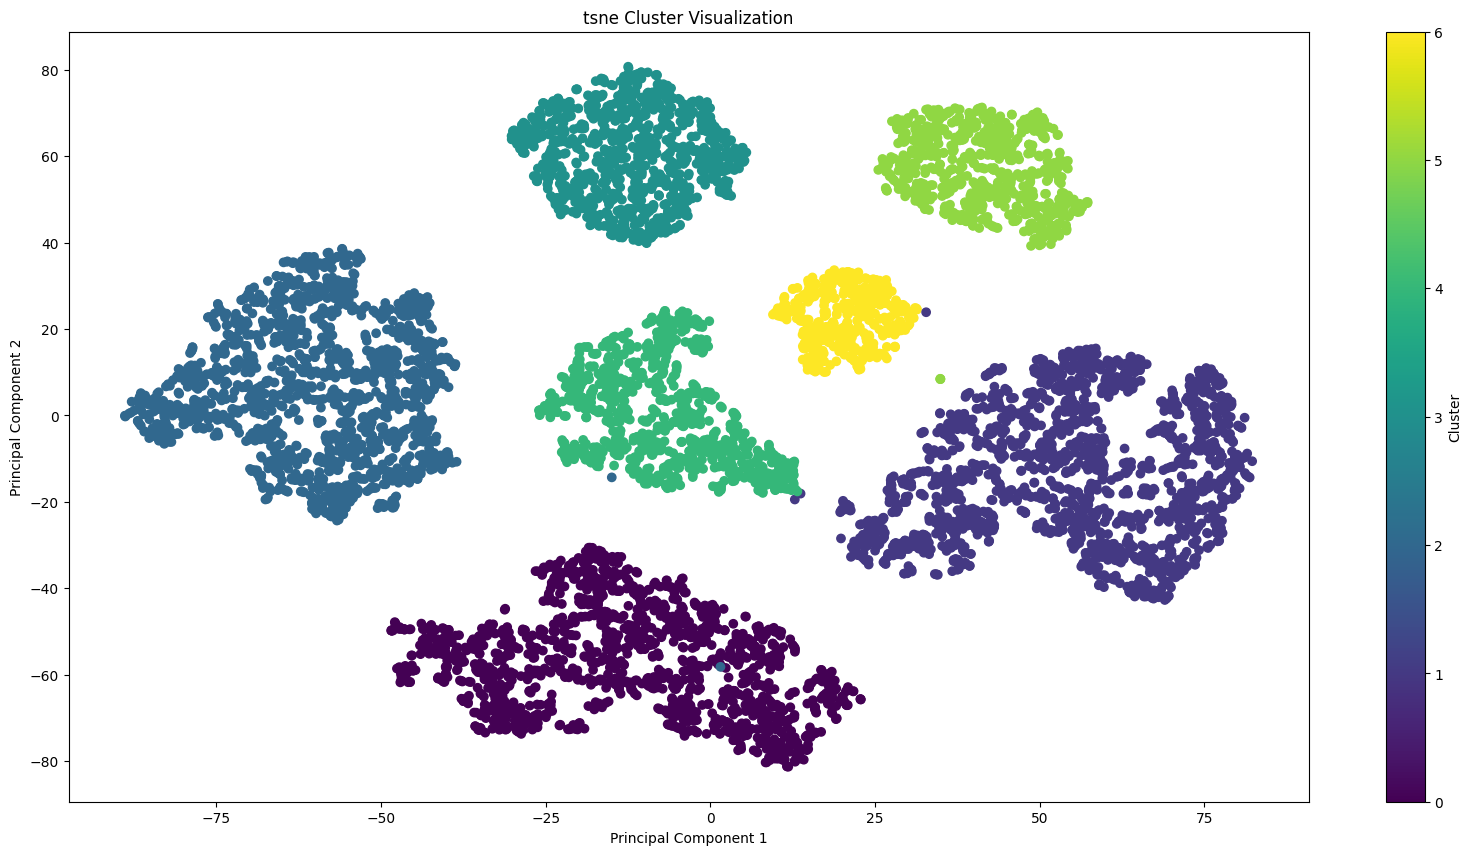

In [67]:
# training
clustering = AgglomerativeClustering(n_clusters=7)

clustering.fit(df_combined)
labels = clustering.labels_

visual_tsne(df_combined, labels)

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

## 7. <a name="6">Business Meaning</a>
(<a href="#0">Go to top</a>)

#### From the algorithms provided, it appears that Kmeans Clustering is the most effective model for clustering customers. Now, uncovering the business implications associated with each cluster.

In [68]:
df_combined.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [69]:
df_combined.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0           0.818182             0.166667                    0.000000   
1           0.909091             0.000000                    0.000000   
2           1.000000             1.000000                    1.000000   
4           1.000000             0.083333                    0.083333   
5           1.000000             0.666667                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  \
0                          0.083333                    0.00          0.000000   
1                          0.000000                    0.25          0.222222   
2                          0.000000                    0.00          0.000000   
4                          0.000000                    0.00          0.000000   
5                          0.583333                    0.00          0.000000   

    BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.713590   4.559126         -2.302585                4.559126   
1  8.071708  -2.302585         -2.302585               -2.302585   
2  7.822144   6.650628          6.650628               -2.302585   
4  6.706635   2.778819          2.778819               -2.302585   
5  7.501043   7.195472         -2.302585                7.195472   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0     -2.302585         -2.302585       0.741937      6.907855  5.307783   
1      8.770757          1.410987      -2.302585      8.853680  8.319506   
2     -2.302585         -2.302585       2.493205      8.922672  6.433208   
4     -2.302585         -2.302585       0.095310      7.090160  6.519788   
5     -2.302585         -2.302585       2.091864      7.495597  7.244340   

   MINIMUM_PAYMENTS    TENURE  
0          4.938851  2.493205  
1          6.977692  2.493205  
2          6.441560  2.493205  
4          5.500814  2.493205  
5          7.786280  2.493205

In [72]:
df_combined.shape

(8636, 17)

In [83]:
df2['kmeans_labels'] = kmeans.labels_
cluster_means = df2.groupby('kmeans_labels').mean()
cluster_means

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
kmeans_labels                                                                  
0              2578.906997           0.957548   539.834771          0.030566   
1               415.712949           0.822524   552.966682          0.111284   
2              1232.728387           0.939669  2498.221642       1528.955935   
3              2209.987937           0.903707     0.002063          0.002063   
4              2380.176017           0.934228   671.481365        671.526515   
5               787.992867           0.792048   902.664618        902.734638   
6              2824.439252           0.969852  1942.067019       1167.737178   

               INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
kmeans_labels                                                              
0                          540.455163   2053.927636             0.654172   
1                          553.919918      0.000000             0.713310   
2                          969.294246      0.000000             0.816211   
3                            0.044070   2011.821561             0.000426   
4                            0.000000   2047.576142             0.278306   
5                            0.023072      0.036933             0.363958   
6                          774.636092   2092.721610             0.780416   

               ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
kmeans_labels                                                                 
0                                0.001089                          0.606614   
1                                0.001335                          0.678470   
2                                0.463441                          0.650104   
3                                0.000257                          0.000296   
4                                0.278198                          0.000000   
5                                0.363215                          0.000330   
6                                0.397604                          0.630191   

               CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
kmeans_labels                                                            
0                            0.261405          6.178649      12.370370   
1                            0.000000          0.000000      12.049238   
2                            0.000000          0.000000      34.882353   
3                            0.276563          6.406994       0.005068   
4                            0.298191          6.946684       6.417425   
5                            0.000165          0.001982       8.017839   
6                            0.292355          7.774676      30.573280   

               CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
kmeans_labels                                                                  
0               4356.862745  1965.913774       1445.777947          0.047129   
1               3120.535395   784.075184        711.236629          0.325209   
2               5731.119288  2319.152001        617.371082          0.259491   
3               4052.669370  1713.535504       1005.858131          0.046025   
4               4662.710722  1985.668600       1032.156301          0.059666   
5               4422.062048  1212.464787        496.417655          0.145453   
6               5828.126731  3048.475094       1244.225196          0.070098   

                  TENURE  kmeans_PCA_labels  
kmeans_labels                                
0              11.324619                0.0  
1              11.507620                1.0  
2              11.810716                2.0  
3              11.360872                3.0  
4              11.340702                4.0  
5              11.604559                5.0  
6              11.622134                6.0

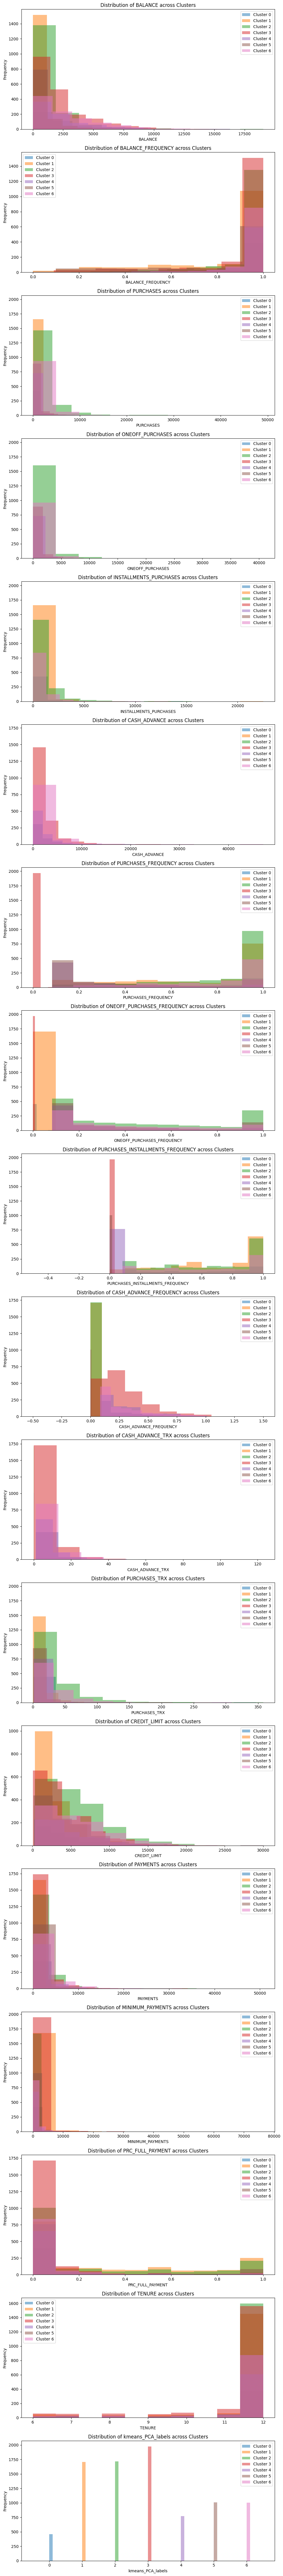

In [91]:
# looping and drawing histogram for each feature.
num_clusters = len(cluster_means)
num_features = len(cluster_means.columns)

fig, axs = plt.subplots(num_features, 1, figsize=(10, 5*num_features))

for i, column in enumerate(cluster_means.columns):
    for cluster_label in range(num_clusters):
        axs[i].hist(df2[df2['kmeans_labels'] == cluster_label][column], alpha=0.5, label=f'Cluster {cluster_label}')

    axs[i].set_title(f'Distribution of {column} across Clusters')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

## Business Definition of each cluster according to different behaviors

### `Cluster 0`

- Customer Behavior:
    - Maintains a moderate balance with frequent balance updates.
    - Engages in occasional purchases, both one-off and installment, with moderate cash advance usage.
- Purchase Behavior:
    - Shows moderate purchase frequency across various types of purchases.
    - Moderate credit limit and payment behavior with occasional full payments.

### `Cluster 1`

- Customer Behavior:
    - Maintains a relatively low balance with irregular balance updates.
    - Engages in frequent purchases, both one-off and installment, with minimal cash advance usage.
- Purchase Behavior:
    - High purchase frequency across various types of purchases.
    - Moderate credit limit and payment behavior with frequent full payments.

### `Cluster 2`
- Customer Behavior:
    - Maintains a moderate balance with frequent balance updates.
    - Engages in frequent purchases, especially one-off purchases, with minimal cash advance usage.
- Purchase Behavior:
    - High frequency of one-off purchases compared to installment purchases.
    - High credit limit and payment behavior with occasional full payments.

### `Cluster 3`

- Customer Behavior:
    - Maintains a moderate balance with frequent balance updates.
    - Engages in frequent purchases, especially one-off purchases, with minimal cash advance usage.
- Purchase Behavior:
    - High frequency of one-off purchases compared to installment purchases.
    - High credit limit and payment behavior with occasional full payments.

### `Cluster 4`

- Customer Behavior:
    - Maintains a moderate balance with frequent balance updates.
    - Engages in frequent purchases, especially one-off purchases, with minimal cash advance usage.
- Purchase Behavior:
    - High frequency of one-off purchases compared to installment purchases.
    - High credit limit and payment behavior with occasional full payments.

### `Cluster 5`
- Customer Behavior:
    - Maintains a moderate balance with frequent balance updates.
    - Engages in frequent purchases, especially one-off purchases, with minimal cash advance usage.
- Purchase Behavior:
    - High frequency of one-off purchases compared to installment purchases.
    - High credit limit and payment behavior with occasional full payments.

### `Cluster 6`
- Customer Behavior:
    - Maintains a moderate balance with frequent balance updates.
    - Engages in frequent purchases, especially one-off purchases, with minimal cash advance usage.
- Purchase Behavior:
    - High frequency of one-off purchases compared to installment purchases.
    - High credit limit and payment behavior with occasional full payments.